In [1]:
%cd /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/CDHU-katrin_youtube_dalia/yolov5 

/zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/CDHU-katrin_youtube_dalia/yolov5


In [2]:
data_path = '/zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/Sverige/sverige_paths.yaml'

In [3]:
import torch
import utils
from IPython import display
from IPython.display import clear_output
from pathlib import Path
import yaml
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import pandas as pd
import matplotlib.pyplot as plt

import yaml

%matplotlib inline

In [4]:
def rename_df_cols(df):
    old_cols = list(df.columns)
    new_cols = ['epoch', 'train/box_loss', 'train/obj_loss',
       'train/cls_loss', 'metrics/precision', 'metrics/recall',
       'metrics/mAP_0.5', 'metrics/mAP_0.5:0.95', 'val/box_loss',
       'val/obj_loss', 'val/cls_loss', '/lr0', 'x/lr1', 'x/lr2']
    aux = dict(zip(old_cols, new_cols))
    df = df.rename(columns=aux)
    return df

def plot_losses(df_results):
    df_results.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'])
    plt.xlabel("Epoch")
    plt.ylabel("Cls_loss")
    #plt.show()
    

def modify_lr_hyperparam(hyperparam_file_path:str, lr_new:float):
    with open(hyperparam_file_path, 'r') as f:
        yaml_dict = yaml.safe_load(f)
        
        # Modify the 'lr' value in the sixth line
        yaml_dict['lr0'] = lr_new
        #print(yaml_dict['lr0'])
        
    # Write the modified YAML back to the file
    with open(hyperparam_file_path, 'w') as f:
        yaml.dump(yaml_dict, f)

Text(0.5, 1.0, 'lr01_b32_e100_f12_V5M6')

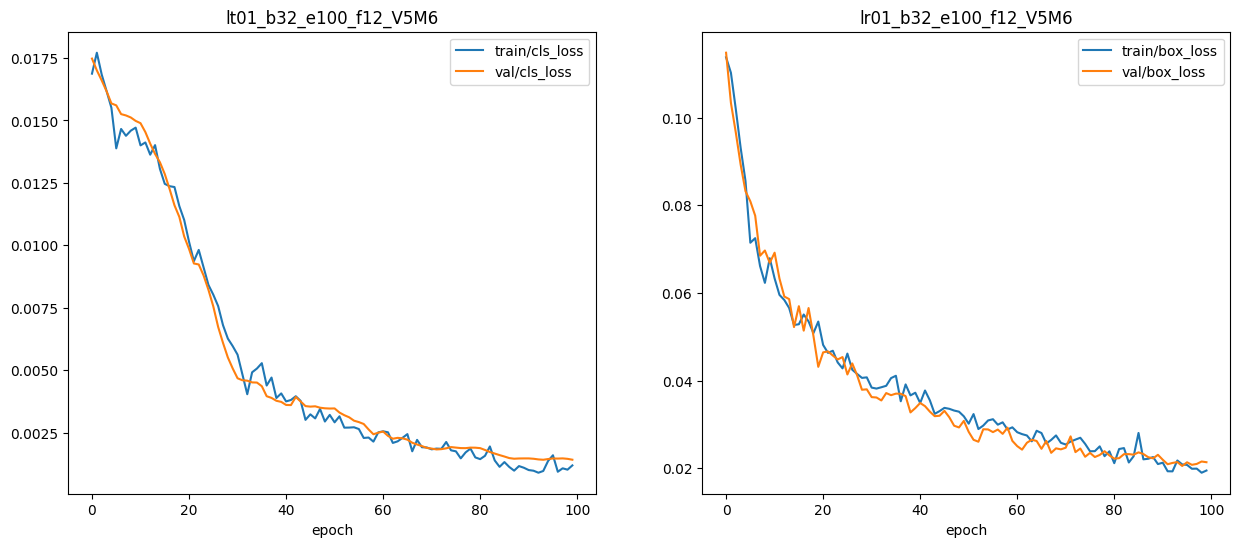

In [5]:
# Bringing best model from previous experiments
model_name = 'lr0.01_b32_e100_f12_V5M6'
results_V5M6 = rename_df_cols(pd.read_csv(f'Sverige/{model_name}/results.csv'))


#Plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
# lr0.01_b32_e100_f12_V5M6
results_V5M6.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[0])
results_V5M6.plot(x='epoch', y=['train/box_loss', 'val/box_loss'], ax=axes[1])

# Set individual title 
axes[0].set_title('lt01_b32_e100_f12_V5M6')
axes[1].set_title('lr01_b32_e100_f12_V5M6')

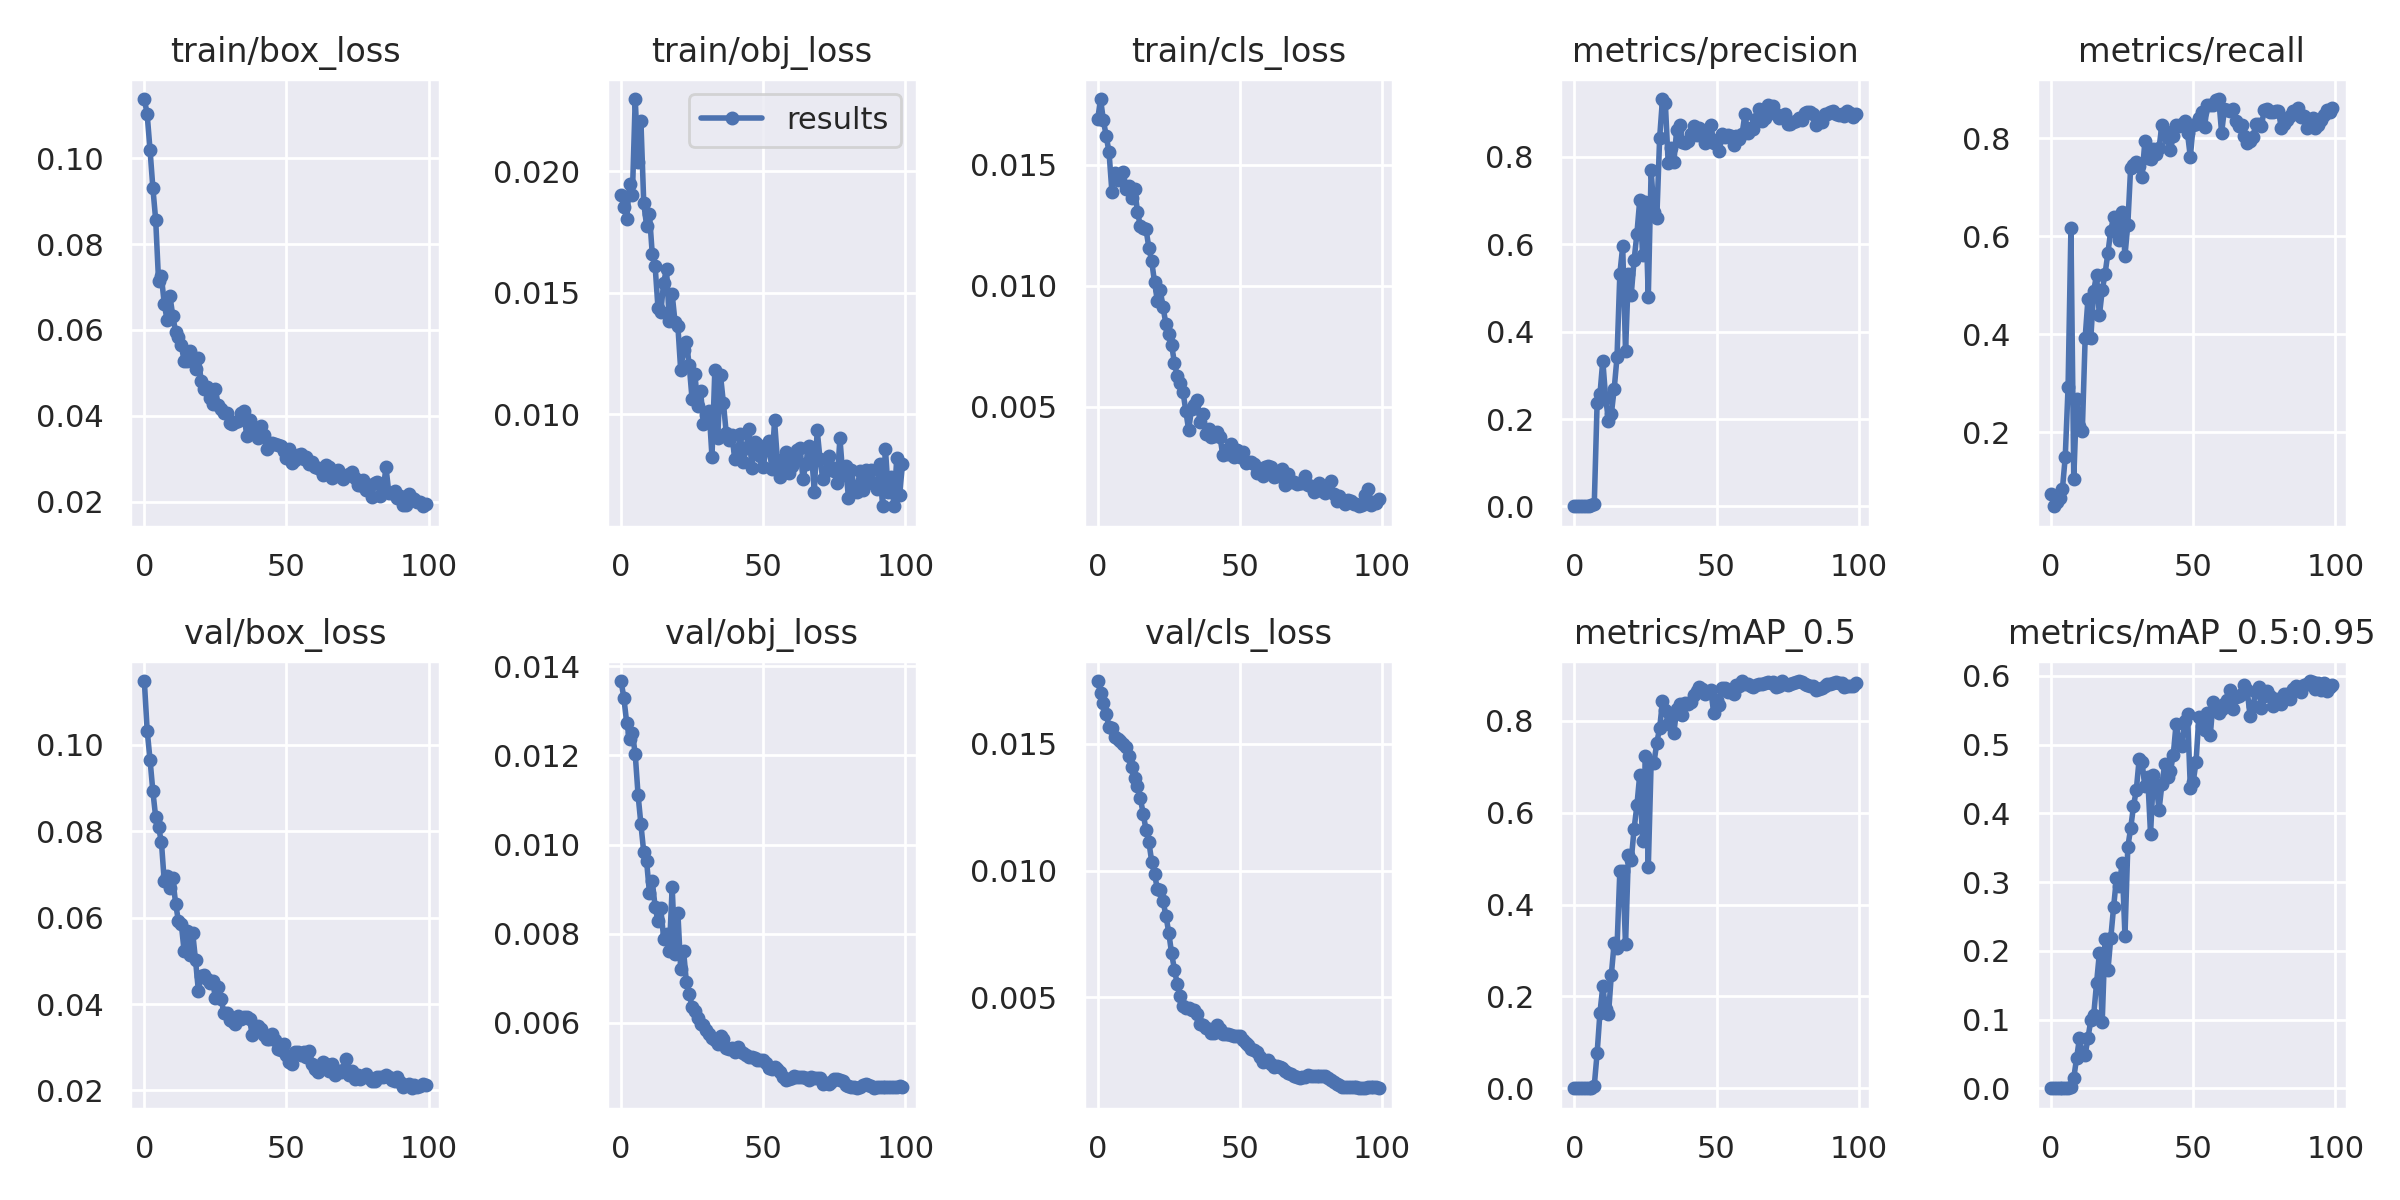

In [7]:
display.Image(f"Sverige/lr0.01_b32_e100_f12_V5M6/results.png")

### Try differet batch size: 64

In [14]:
# Set batch size 

batch_s = 64
hyper_path = 'Sverige/hyp.swedish_finetune_med.yaml'
model_name = 'lr0.01_b64_e100_f12_V5M6'
'''
!python train.py --batch 64 \
--epochs 100 \
--data {data_path} \
--hyp {hyper_path}\
--weights yolov5m6.pt \
--cache \
--freeze 12 \
--project Sverige \
--name {model_name}'''

train: weights=yolov5m6.pt, cfg=, data=/zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/Sverige/sverige_paths.yaml, hyp=Sverige/hyp.swedish_finetune_med.yaml, epochs=100, batch_size=64, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=Sverige, name=lr0.01_b64_e100_f12_V5M6, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[12], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 13 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5 🚀 v7.0-120-g3e55763 Python-3.10.8 torch-2.0.0+cu117 CUDA:0 (Quadro RTX 5000, 16125MiB)

hyperparameters: anchor_t=4.0, box=0.05, cls=0.3, cls_pw=1.0, copy_paste=

WARNING ⚠️ DP not recommended, use torch.distributed.run for best DDP Multi-GPU results.
See Multi-GPU Tutorial at https://github.com/ultralytics/yolov5/issues/475 to get started.
train: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-mea
  0%|          | 0/166 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
train: Caching images (0.1GB ram): 100%|██████████| 166/166 [00:00<00:00, 326.53
val: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means
libpng warning: iCCP: known incorrect sRGB profile
val: Caching images (0.0GB ram):  13%|█▎        | 6/46 [00:00<00:00, 59.11it/s]libpng warning: iCCP: known incorrect sRGB profile
val: Caching images (0.0GB ram): 100%|██████████| 46/46 [00:00<00:00, 133.27it/s

AutoAnchor: 4.10 anchors/target, 0.998 Best Possible Recall (BPR). Current anchors are a good fit to dataset ✅
Plotting labels to Sverige/lr0.01_b64_e100_f12_V5M6/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloa

      21/99      6.55G    0.05125    0.01485    0.01272        256        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.309      0.444      0.313      0.104

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      22/99      6.55G    0.05179    0.01646    0.01267        213        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.425      0.515      0.414      0.172

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      23/99      6.55G    0.04888    0.01505    0.01294        173        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.228      0.265      0.144     0.0363

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      24/9

      46/99      6.55G    0.03674   0.009442   0.004352        207        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.826      0.768      0.804      0.374

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      47/99      6.55G    0.04052   0.009326   0.004724        232        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.808      0.733      0.786      0.423

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      48/99      6.55G     0.0404   0.009557   0.004207        221        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.794      0.806      0.807      0.415

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      49/9

      71/99      6.55G    0.03026   0.007511   0.002587        199        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.921       0.77      0.854      0.499

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      72/99      6.55G     0.0269   0.008775   0.001967        246        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.936      0.797      0.874      0.561

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      73/99      6.55G    0.02702   0.007828   0.001813        143        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.891      0.811      0.882      0.546

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      74/9

      96/99      6.55G     0.0208   0.007261   0.001358        243        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121       0.89      0.827      0.873       0.58

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      97/99      6.55G    0.02137   0.007384     0.0012        190        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.873      0.836      0.881      0.585

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      98/99      6.55G    0.01859   0.007052  0.0009177        187        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.922      0.792      0.876      0.593

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      99/9

Text(0.5, 1.0, 'lr0.01_b64_e100_f12_V5M6')

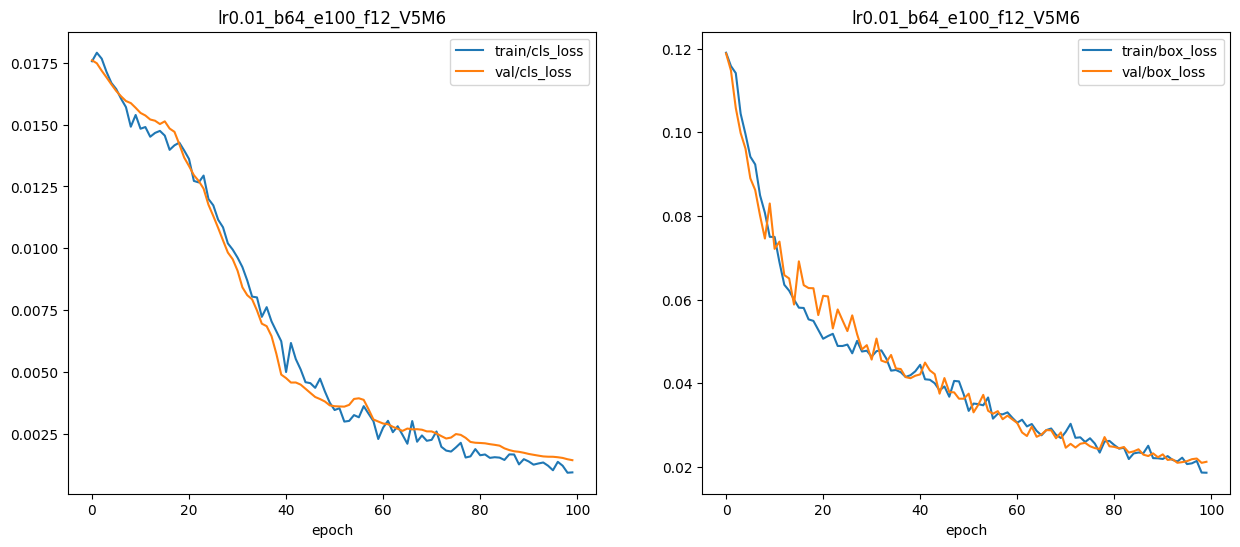

In [6]:
# Bringing best model from previous experiments
model_name = 'lr0.01_b64_e100_f12_V5M6'
results_b64_V5M6 = rename_df_cols(pd.read_csv(f'Sverige/{model_name}/results.csv'))


#Plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
# lr0.01_b32_e100_f12_V5M6
results_b64_V5M6.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[0])
results_b64_V5M6.plot(x='epoch', y=['train/box_loss', 'val/box_loss'], ax=axes[1])

# Set individual title 
axes[0].set_title('lr0.01_b64_e100_f12_V5M6')
axes[1].set_title('lr0.01_b64_e100_f12_V5M6')

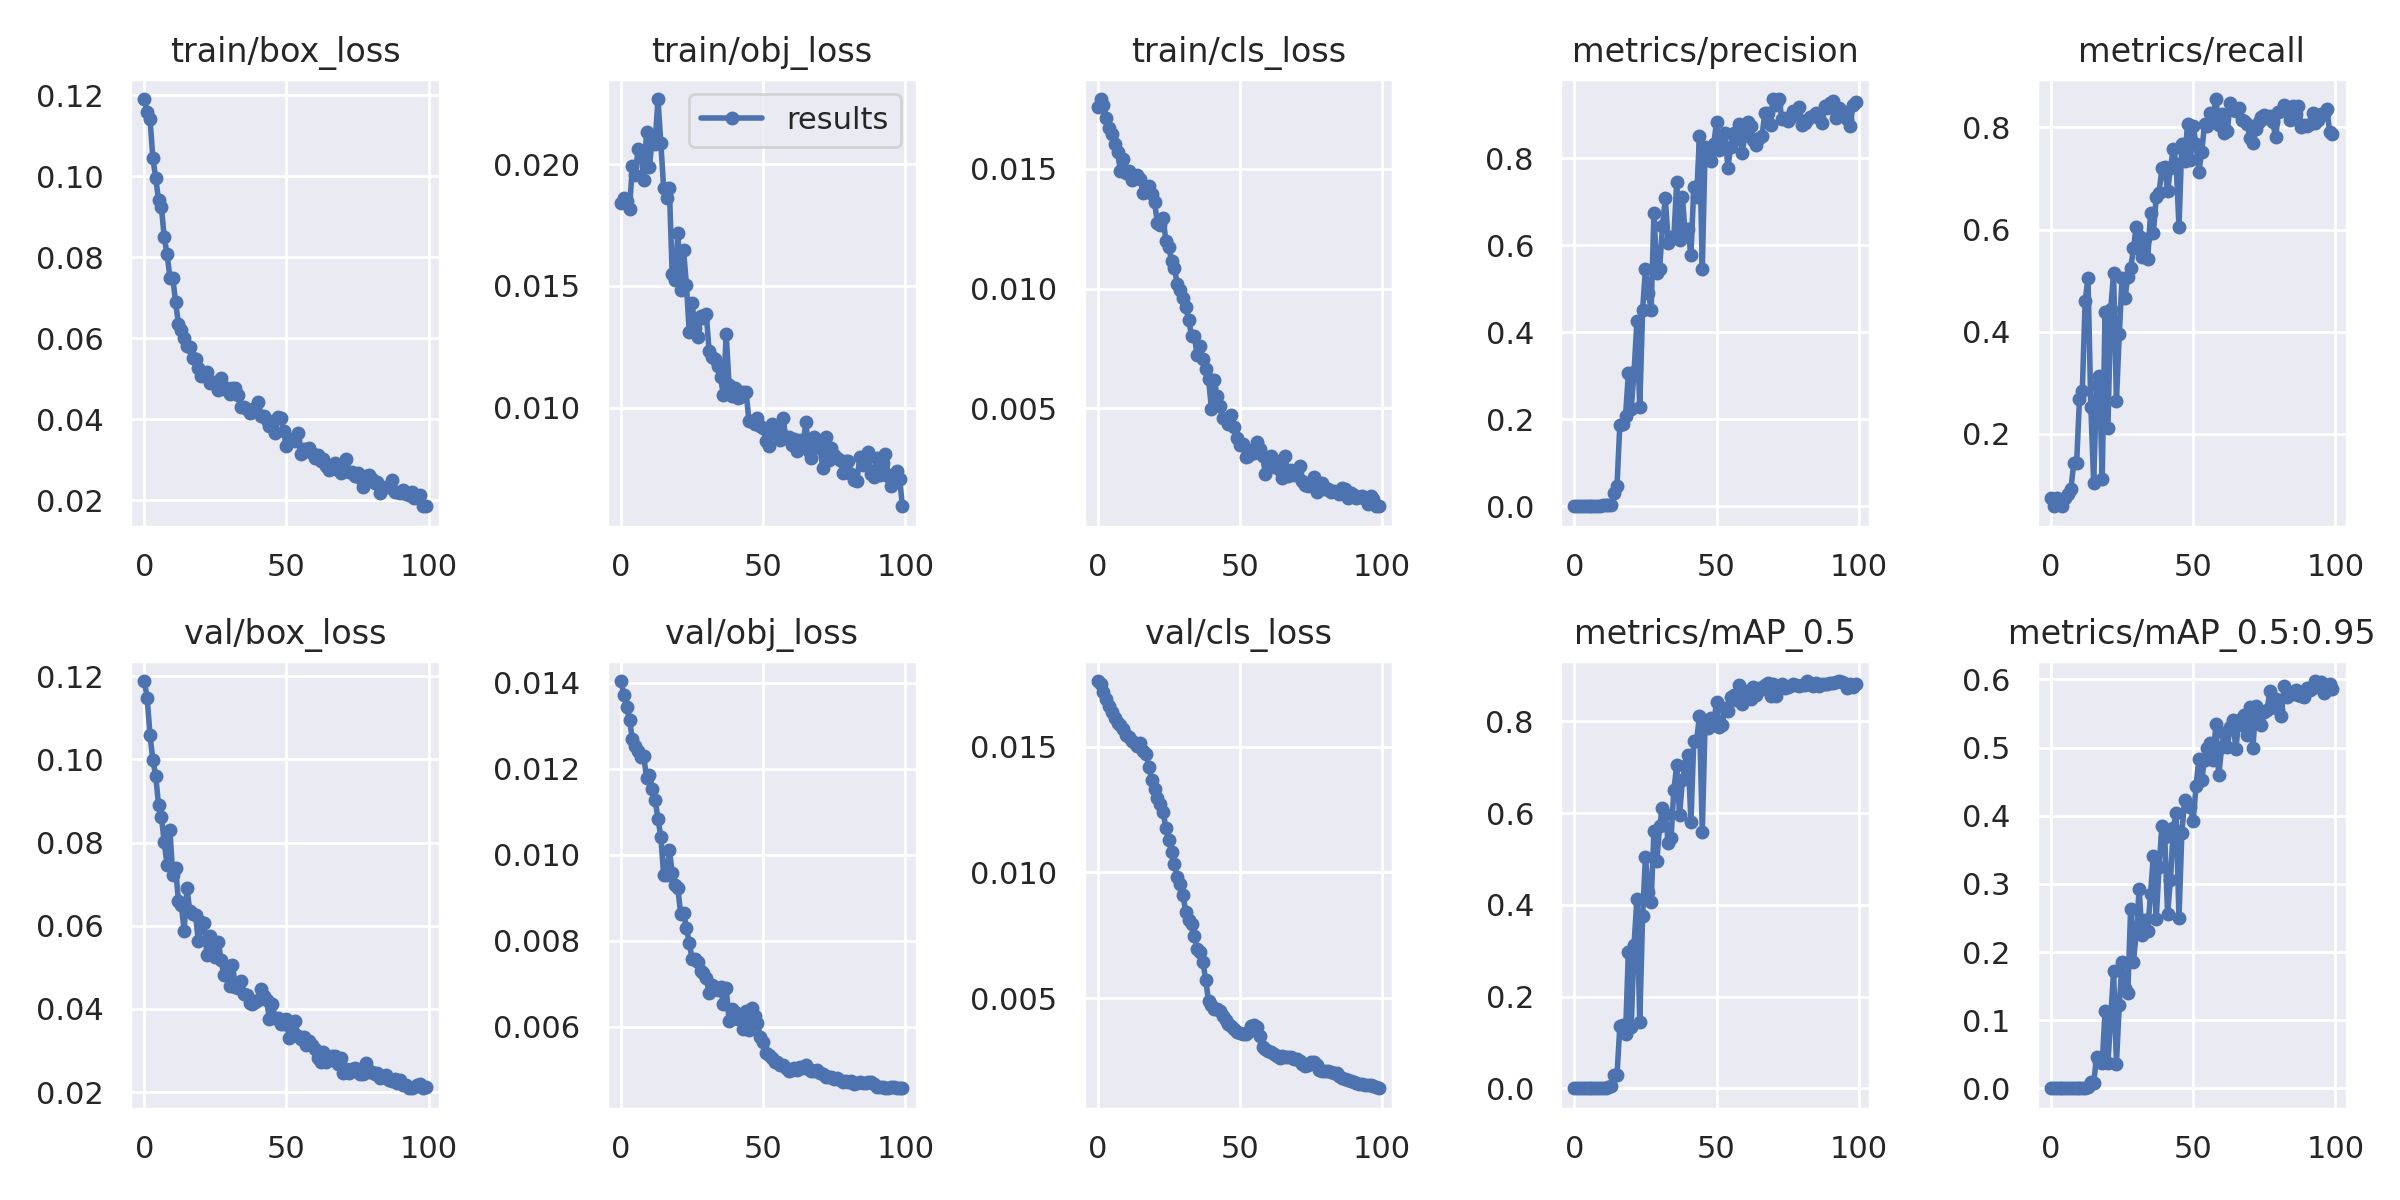

In [9]:
display.Image(f"Sverige/lr0.01_b64_e100_f12_V5M6/results.png")

## The model selected is <span style="color:red">lr0.01_b32_e100_f12_V5M6</span>. 

* Batch size 32
* Learning rate 0.01

### Other hyperparameters of interest

* Degree: This parameter helps most when you need to detect objects in multiple positions/angles (# image rotation (+/- deg))
* flipud: used to flip images up and down randomly  # image flip up-down (probability)
* fliplr: to flip images left and right randomly  # image flip left-right (probability)

In [7]:
"""degrees: 0.0  # image rotation (+/- deg)
translate: 0.1  # image translation (+/- fraction)
scale: 0.9  # image scale (+/- gain)
shear: 0.0  # image shear (+/- deg)
perspective: 0.0  # image perspective (+/- fraction), range 0-0.001
flipud: 0.0  # image flip up-down (probability)
fliplr: 0.5  # image flip left-right (probability)
mosaic: 1.0  # image mosaic (probability)
mixup: 0.1  # image mixup (probability)
"""

def hyperparam_tuning(hyperparam_file_path:str, lr_new=0.1, degrees_new=0.0, translate_new=0.1, scale_new=0.9, shear_new=0.0, perspective_new=0.0, 
                      flipud_new=0.0, fliplr_new=0.5, mosaic_new=1.0, mixup_new=0.1):
    
    # Open hyperparamentes file 
    with open(hyperparam_file_path, 'r') as f:
        yaml_dict = yaml.safe_load(f)
        
        # Modify the 'lr' value in the sixth line
        yaml_dict['lr0'] = lr_new
        yaml_dict['degrees'] = degrees_new
        yaml_dict['translate']= translate_new
        yaml_dict['scale']= scale_new
        yaml_dict['shear']= shear_new
        yaml_dict['perspective']= perspective_new
        yaml_dict['flipud']= flipud_new
        yaml_dict['fliplr']= fliplr_new
        yaml_dict['mosaic']= mosaic_new
        yaml_dict['mixup']= mixup_new
        
        
    # Write the modified YAML back to the file
    with open(hyperparam_file_path, 'w') as f:
        yaml.dump(yaml_dict, f)

#### New training

In [15]:
batch_s = 32
hyper_path = 'Sverige/hyp.swedish_finetune_med.yaml'
model_name = 'lr0.01_b32_e150_f12_V5M6_aug'

hyperparam_tuning(hyper_path, degrees_new=45.0, flipud_new=0.5)

In [16]:
'''!python train.py --batch 64 \
--epochs 150 \
--data {data_path} \
--hyp {hyper_path}\
--weights yolov5m6.pt \
--cache \
--freeze 12 \
--project Sverige \
--name {model_name}'''

train: weights=yolov5m6.pt, cfg=, data=/zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/Sverige/sverige_paths.yaml, hyp=Sverige/hyp.swedish_finetune_med.yaml, epochs=150, batch_size=64, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=Sverige, name=lr0.01_b32_e150_f12_V5M6_aug, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[12], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 2 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), 2.16 KiB | 1.08 MiB/s, done.
From https://github.com/ultralytics/yolov

WARNING ⚠️ DP not recommended, use torch.distributed.run for best DDP Multi-GPU results.
See Multi-GPU Tutorial at https://github.com/ultralytics/yolov5/issues/475 to get started.
train: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-mea
  0%|          | 0/166 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
train: Caching images (0.1GB ram): 100%|██████████| 166/166 [00:00<00:00, 325.68
val: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means
libpng warning: iCCP: known incorrect sRGB profile
val: Caching images (0.0GB ram):  15%|█▌        | 7/46 [00:00<00:00, 53.36it/s]libpng warning: iCCP: known incorrect sRGB profile
val: Caching images (0.0GB ram): 100%|██████████| 46/46 [00:00<00:00, 143.70it/s

AutoAnchor: 4.10 anchors/target, 0.998 Best Possible Recall (BPR). Current anchors are a good fit to dataset ✅
Plotting labels to Sverige/lr0.01_b32_e150_f12_V5M6_aug/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dat

     21/149      6.55G    0.07046    0.01384   0.008327        257        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.257      0.598      0.242     0.0656

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     22/149      6.55G     0.0733    0.01568   0.007874        233        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.165      0.364      0.135     0.0342

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     23/149      6.55G    0.06881     0.0145   0.008801        181        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121     0.0711      0.357      0.055     0.0176

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     24/14

     46/149      6.55G    0.06016    0.01195   0.004496        204        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.346      0.341      0.248     0.0703

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     47/149      6.55G    0.05842    0.01299   0.004405        247        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.182       0.51      0.183     0.0638

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     48/149      6.55G    0.05494    0.01296   0.003864        230        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.411      0.429      0.343       0.11

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     49/14

     71/149      6.55G    0.04528    0.01154   0.003419        238        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.843      0.783      0.844      0.376

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     72/149      6.55G    0.04614    0.01287    0.00245        282        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.806      0.829      0.845      0.383

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     73/149      6.55G    0.04193    0.01171   0.002817        154        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.883      0.748      0.819      0.347

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     74/14

     96/149      6.55G    0.03558    0.01101   0.001946        249        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121       0.85      0.793      0.862      0.449

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     97/149      6.55G    0.03769     0.0112   0.002549        196        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.804      0.814      0.851      0.456

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     98/149      6.55G    0.03689    0.01142   0.001933        213        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.835      0.779      0.853      0.451

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     99/14

    121/149      6.55G     0.0346    0.01148   0.001788        252        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.892      0.826      0.897      0.499

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    122/149      6.55G    0.03232   0.009747   0.002362        250        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.919      0.822      0.891      0.527

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    123/149      6.55G    0.03175    0.01087   0.002876        282        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.918      0.825      0.893      0.482

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    124/14

    146/149      6.55G    0.03054   0.009641   0.001484        246        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.912      0.815      0.881      0.527

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    147/149      6.55G    0.03008    0.01021    0.00118        332        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.911      0.819      0.885      0.526

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    148/149      6.55G    0.02849    0.01056   0.001425        202        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.913      0.819       0.89      0.526

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    149/14

Text(0.5, 1.0, 'lr0.01_b64_e100_f12_V5M6')

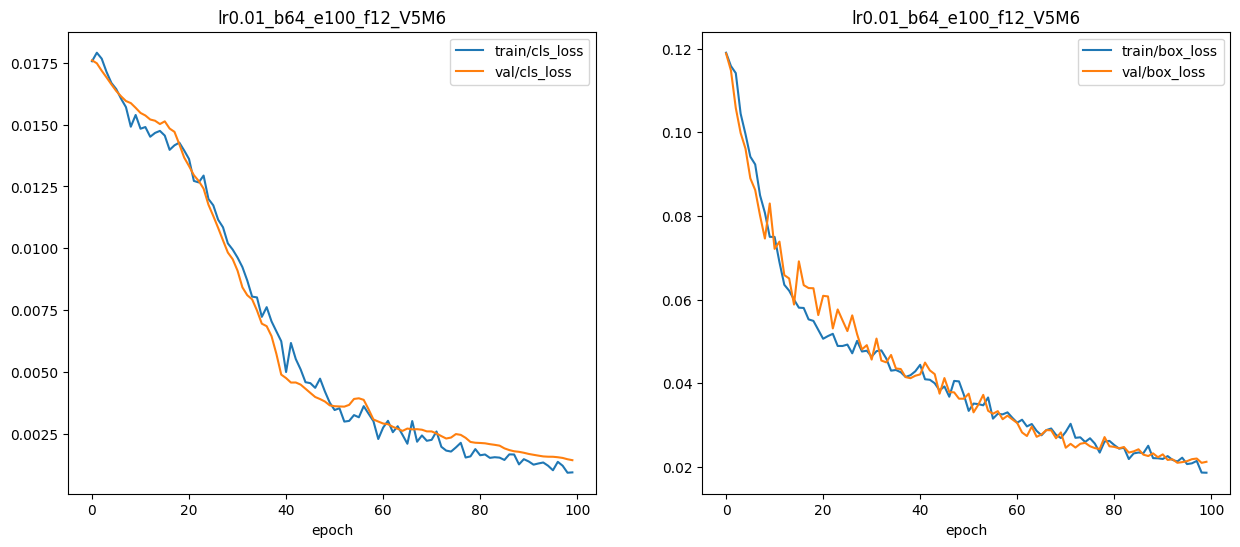

In [8]:
results_b32_V5M6_aug = rename_df_cols(pd.read_csv(f'Sverige/{model_name}/results.csv'))

#Plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
# lr0.01_b32_e100_f12_V5M6
results_b32_V5M6_aug.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[0])
results_b32_V5M6_aug.plot(x='epoch', y=['train/box_loss', 'val/box_loss'], ax=axes[1])

# Set individual title 
axes[0].set_title('lr0.01_b64_e100_f12_V5M6')
axes[1].set_title('lr0.01_b64_e100_f12_V5M6')

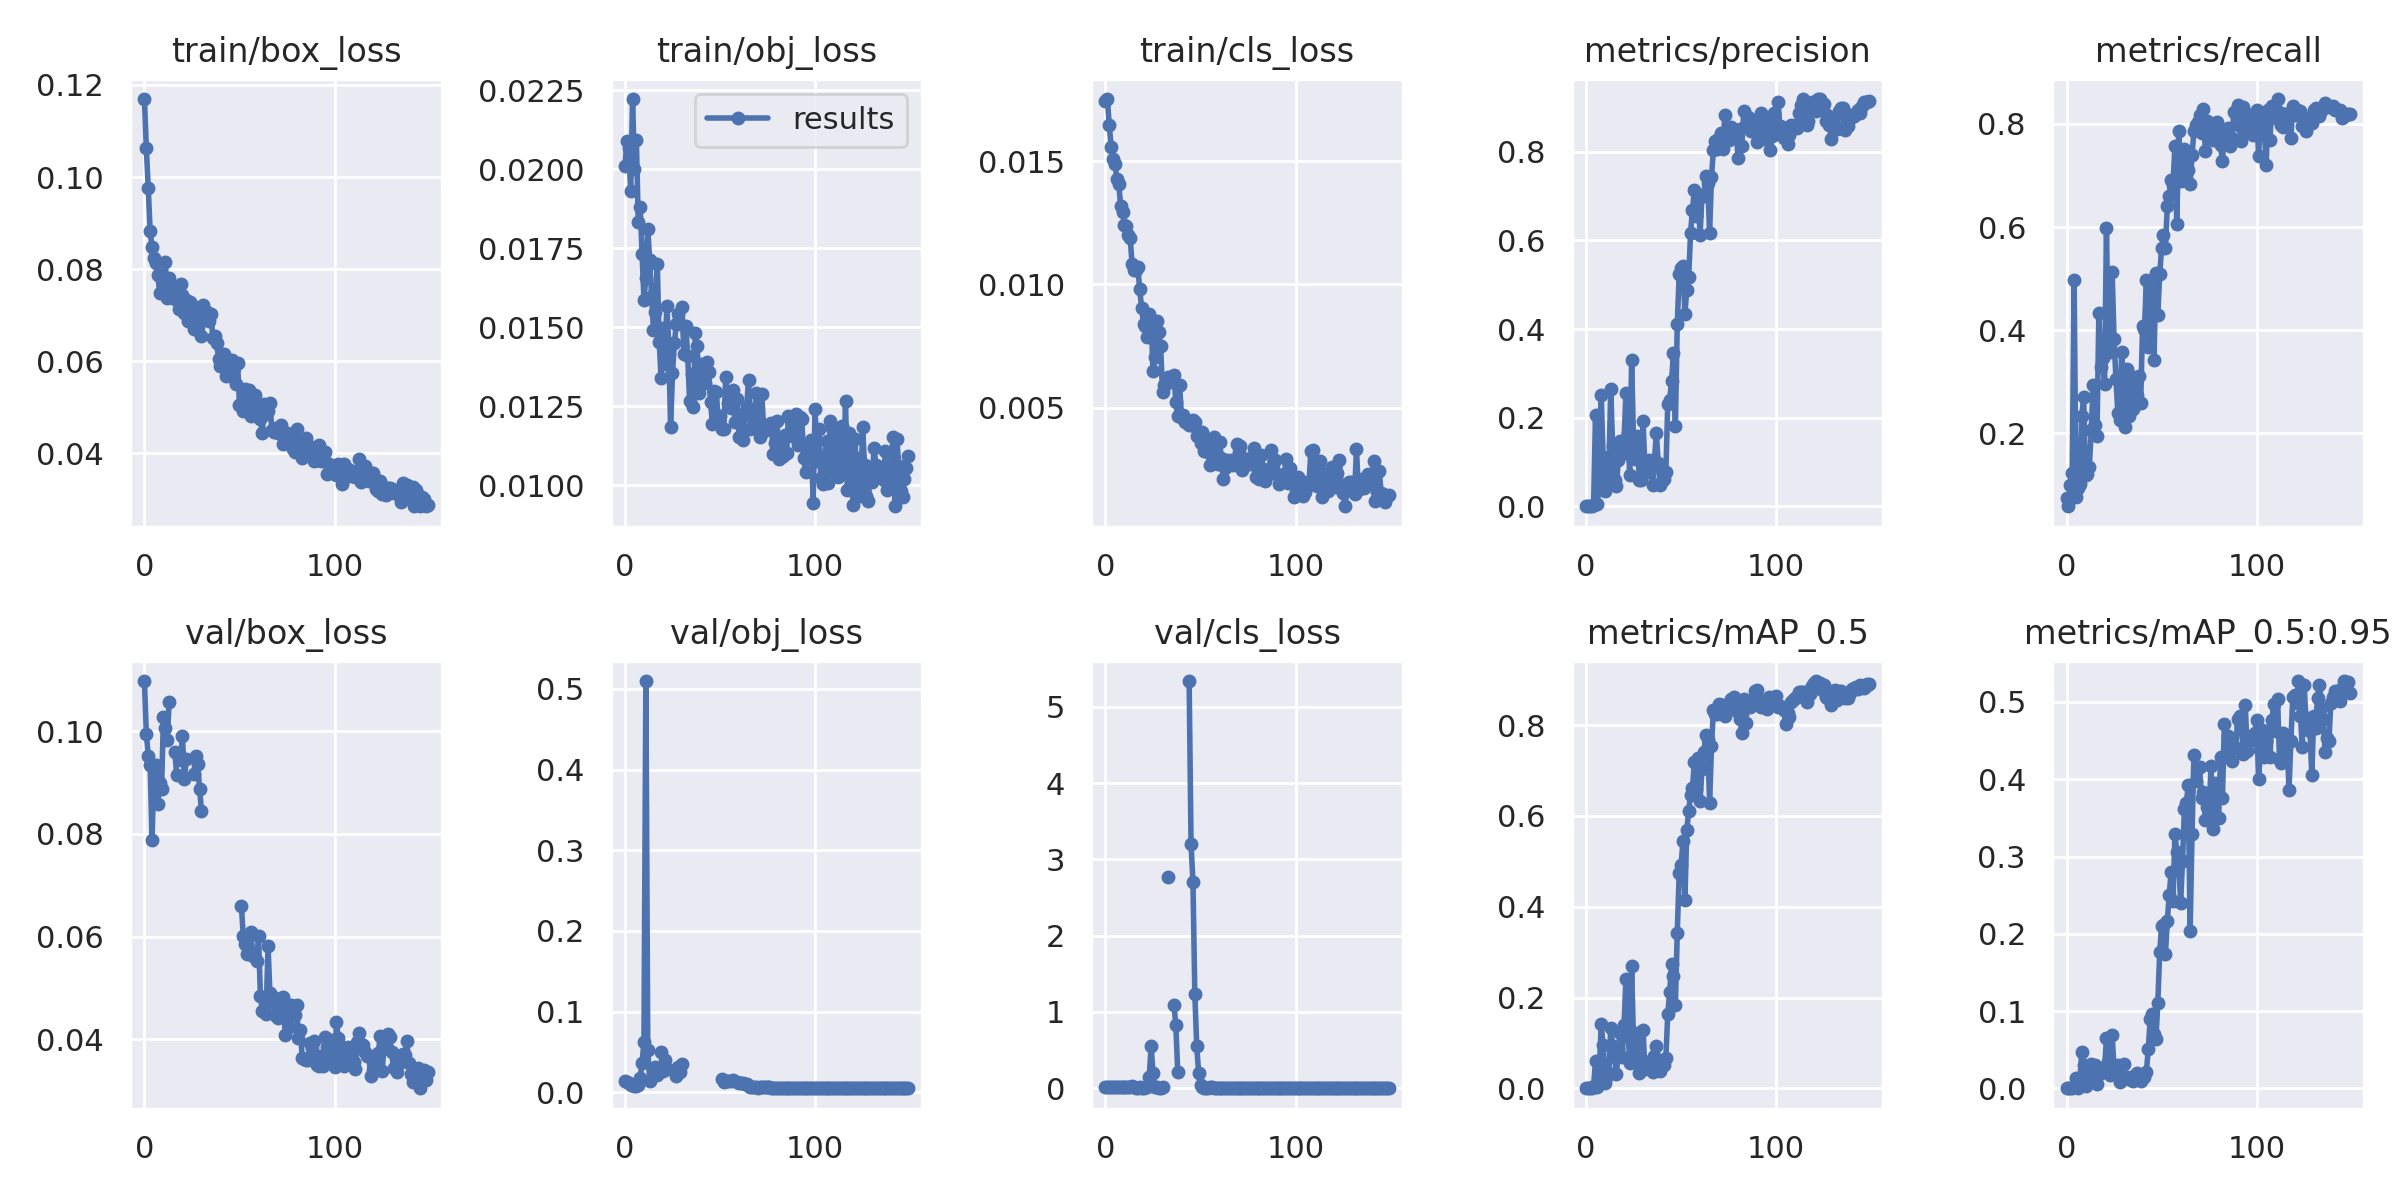

In [18]:
display.Image(f"Sverige/lr0.01_b32_e150_f12_V5M6_aug/results.png")

### Hyperparameter tunning: Exploring only "degree"

In [9]:
# Set batch size 
batch_s = 32
hyper_path = 'Sverige/hyp.swedish_finetune_med.yaml'
degrees_ls = [45,90,135,180]

for degree in degrees_ls:
    # Give a name to the model
    model_name = f'lr0.01_b32_e150_f12_V5M6_aug_d{degree}'
    print(f'**************TRAINING MODEL {model_name}*********')
    
    # Modify hyperparameters
    hyperparam_tuning(hyper_path, degrees_new=degree)
     
    # Train
    !python train.py --batch {batch_s} \
    --epochs 150 \
    --data {data_path} \
    --hyp {hyper_path}\
    --weights yolov5m6.pt \
    --cache \
    --freeze 12 \
    --project Sverige \
    --name {model_name}

**************TRAINING MODEL lr0.01_b32_e150_f12_V5M6_aug_d45*********
train: weights=yolov5m6.pt, cfg=, data=/zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/Sverige/sverige_paths.yaml, hyp=Sverige/hyp.swedish_finetune_med.yaml, epochs=150, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=Sverige, name=lr0.01_b32_e150_f12_V5M6_aug_d45, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[12], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 14 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5 🚀 v7.0-120-g3e55763 Python-3.10.8 torch-2.0.0+cu117 CUDA:0 (Quadro RTX 5000, 16125

WARNING ⚠️ DP not recommended, use torch.distributed.run for best DDP Multi-GPU results.
See Multi-GPU Tutorial at https://github.com/ultralytics/yolov5/issues/475 to get started.
train: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-mea
  0%|          | 0/166 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
train: Caching images (0.1GB ram): 100%|██████████| 166/166 [00:00<00:00, 327.35
val: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means
libpng warning: iCCP: known incorrect sRGB profile
val: Caching images (0.0GB ram): 100%|██████████| 46/46 [00:00<00:00, 79.41it/s]

AutoAnchor: 4.10 anchors/target, 0.998 Best Possible Recall (BPR). Current anchors are a good fit to dataset ✅
Plotting labels to Sverige/lr0.01_b32_e150_f12_V5M6_aug_d45/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to Sverige/lr0.01_b32_e150_f12_V5M6_aug_d45
Starting training for 150 epochs...

      Epoch  

                 Class     Images  Instances          P          R      mAP50   
                   all         46        121     0.0379      0.115      0.012    0.00273

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     21/149      4.73G    0.07553    0.01295   0.008607         21        640: 1
                 Class     Images  Instances          P          R      mAP50   WARNING ⚠️ NMS time limit 2.800s exceeded
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121     0.0601      0.162     0.0325    0.00939

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     22/149      4.74G    0.07724    0.01454    0.00911         82        640: 1
                 Class     Images  Instances          P          R      mAP50   WARNING ⚠️ NMS time limit 2.800s exceeded
                 Class     Images  Instances          P          R      mAP50   
               

     69/149      4.74G    0.04716    0.01465   0.003635         92        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.776      0.757      0.815       0.29

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     70/149      4.74G    0.04698    0.01246   0.003093         51        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.824      0.737      0.814      0.321

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     71/149      4.74G     0.0458    0.01159    0.00294         25        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.852      0.738      0.825      0.428

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     72/14

     94/149      4.74G    0.03788    0.01071   0.002607         17        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.881      0.821      0.878       0.49

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     95/149      4.74G    0.03653    0.01155   0.002222         42        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.911      0.787      0.893      0.541

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     96/149      4.74G    0.03682   0.009548   0.001964         36        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.841      0.824      0.864      0.502

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     97/14

    119/149      4.74G    0.03181    0.01073   0.002133         12        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121       0.84      0.818      0.875       0.54

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    120/149      4.74G    0.03356    0.01006   0.001918         55        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.878      0.773      0.869      0.517

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    121/149      4.74G    0.03405    0.01099   0.001719         45        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.858      0.794      0.871      0.472

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    122/14

    144/149      4.74G    0.02992   0.008907   0.001982         20        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.914      0.818      0.878      0.522

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    145/149      4.74G    0.02989    0.01087   0.001392         39        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.903       0.83      0.875      0.524

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    146/149      4.74G    0.02967   0.009638   0.001153         26        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.903      0.827      0.887      0.533

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    147/14

Model summary: 379 layers, 35281716 parameters, 35281716 gradients, 49.3 GFLOPs

Transferred 619/627 items from yolov5m6.pt
AMP: checks passed ✅
freezing model.0.conv.weight
freezing model.0.bn.weight
freezing model.0.bn.bias
freezing model.1.conv.weight
freezing model.1.bn.weight
freezing model.1.bn.bias
freezing model.2.cv1.conv.weight
freezing model.2.cv1.bn.weight
freezing model.2.cv1.bn.bias
freezing model.2.cv2.conv.weight
freezing model.2.cv2.bn.weight
freezing model.2.cv2.bn.bias
freezing model.2.cv3.conv.weight
freezing model.2.cv3.bn.weight
freezing model.2.cv3.bn.bias
freezing model.2.m.0.cv1.conv.weight
freezing model.2.m.0.cv1.bn.weight
freezing model.2.m.0.cv1.bn.bias
freezing model.2.m.0.cv2.conv.weight
freezing model.2.m.0.cv2.bn.weight
freezing model.2.m.0.cv2.bn.bias
freezing model.2.m.1.cv1.conv.weight
freezing model.2.m.1.cv1.bn.weight
freezing model.2.m.1.cv1.bn.bias
freezing model.2.m.1.cv2.conv.weight
freezing model.2.m.1.cv2.bn.weight
freezing model.2.m.1.cv2.bn


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      4/149      4.73G    0.08107    0.01628    0.01453         22        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121     0.0592      0.069     0.0263    0.00531

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      5/149      4.74G    0.07093    0.01952     0.0131         37        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.167      0.337      0.109     0.0283

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      6/149      4.74G    0.07333     0.0168    0.01272         95        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.286      0.195      0.202     0.0512

      Epo

     28/149      4.74G    0.06819    0.01447   0.006742         39        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.336      0.475      0.259     0.0767

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     29/149      4.74G    0.06558    0.01315   0.006818         18        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.243      0.539      0.245     0.0769

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     30/149      4.74G    0.06576    0.01248   0.006479         22        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.348      0.417      0.203      0.056

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     31/14

     53/149      4.74G    0.04824    0.01187   0.003984         27        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.838      0.738      0.821      0.313

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     54/149      4.74G    0.04792    0.01452   0.003138         66        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.717      0.758      0.752      0.317

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     55/149      4.74G    0.05033    0.01277   0.004049         29        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121       0.69      0.705      0.739      0.354

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     56/14

     78/149      4.74G    0.04199    0.01253   0.002288         17        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.828      0.752      0.807      0.433

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     79/149      4.74G     0.0449    0.01233   0.002199         17        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.868      0.739      0.822      0.479

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     80/149      4.74G    0.04105    0.01119   0.002427         16        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.829      0.776      0.831      0.466

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     81/14

    103/149      4.74G    0.03945     0.0138   0.002389         79        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121       0.85      0.784      0.842      0.463

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    104/149      4.74G     0.0376    0.01043    0.00225         20        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121       0.91       0.76      0.866      0.443

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    105/149      4.74G    0.03685    0.01049   0.002682         11        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.927      0.766      0.868      0.485

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    106/14

    128/149      4.74G    0.03589    0.01181   0.001653         65        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.839      0.823      0.853      0.509

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    129/149      4.74G    0.03788    0.01193   0.002989         76        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.859       0.81      0.846      0.493

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    130/149      4.74G    0.03359    0.01022   0.001646         27        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.866      0.816      0.858      0.475

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    131/14

github: ⚠️ YOLOv5 is out of date by 14 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5 🚀 v7.0-120-g3e55763 Python-3.10.8 torch-2.0.0+cu117 CUDA:0 (Quadro RTX 5000, 16125MiB)

hyperparameters: anchor_t=4.0, box=0.05, cls=0.3, cls_pw=1.0, copy_paste=0.1, degrees=135, fl_gamma=0.0, fliplr=0.5, flipud=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, iou_t=0.2, lr0=0.1, lrf=0.1, mixup=0.1, momentum=0.937, mosaic=1.0, obj=0.7, obj_pw=1.0, perspective=0.0, scale=0.9, shear=0.0, translate=0.1, warmup_bias_lr=0.1, warmup_epochs=3.0, warmup_momentum=0.8, weight_decay=0.0005
ClearML: run 'pip install clearml' to automatically track, visualize and remotely train YOLOv5 🚀 in ClearML
Comet: run 'pip install comet_ml' to automatically track and visualize YOLOv5 🚀 runs in Comet
TensorBoard: Start with 'tensorboard --logdir Sverige', view at http://localhost:6006/
Overriding model.yaml nc=80 with nc=2

                 from  n    params  module                     

WARNING ⚠️ DP not recommended, use torch.distributed.run for best DDP Multi-GPU results.
See Multi-GPU Tutorial at https://github.com/ultralytics/yolov5/issues/475 to get started.
train: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-mea
  0%|          | 0/166 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
train: Caching images (0.1GB ram): 100%|██████████| 166/166 [00:00<00:00, 323.90
val: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means
libpng warning: iCCP: known incorrect sRGB profile
val: Caching images (0.0GB ram): 100%|██████████| 46/46 [00:00<00:00, 77.49it/s]

AutoAnchor: 4.10 anchors/target, 0.998 Best Possible Recall (BPR). Current anchors are a good fit to dataset ✅
Plotting labels to Sverige/lr0.01_b32_e150_f12_V5M6_aug_d135/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to Sverige/lr0.01_b32_e150_f12_V5M6_aug_d135
Starting training for 150 epochs...

      Epoch


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     21/149      4.73G    0.08134    0.01496   0.009771         22        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121          0          0          0          0

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     22/149      4.73G    0.08053    0.01492    0.00847         84        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121          0          0          0          0

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     23/149      4.73G    0.07426    0.01707    0.00877         50        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121          0          0          0          0

      Epo


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     46/149      4.74G    0.05189    0.01226   0.003747         20        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121       0.53      0.587      0.506      0.151

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     47/149      4.74G    0.06256    0.01242   0.003945         40        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.651      0.542      0.539      0.183

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     48/149      4.74G    0.05438    0.01342   0.003923         32        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.783      0.641      0.739      0.293

      Epo


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     71/149      4.74G    0.05082    0.01176   0.002861         25        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.736      0.715      0.719       0.33

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     72/149      4.74G    0.04703    0.01209   0.002894         38        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.782      0.772      0.795      0.353

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     73/149      4.74G    0.04794     0.0139   0.004008         87        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.775       0.79      0.817      0.292

      Epo


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     96/149      4.74G      0.041    0.01015   0.002116         37        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121       0.86      0.759       0.84      0.394

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     97/149      4.74G    0.03912    0.01431   0.002769         32        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.887       0.78      0.842      0.422

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     98/149      4.74G    0.04037    0.01129   0.001535         34        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.889       0.78      0.842      0.378

      Epo


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    121/149      4.74G    0.03813    0.01152   0.002044         41        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.839      0.795      0.845      0.403

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    122/149      4.74G    0.03639    0.01242   0.002033         40        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.881      0.815      0.864      0.498

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    123/149      4.74G    0.03599   0.009396     0.0033         49        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.888      0.812      0.868      0.472

      Epo


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    146/149      4.74G    0.03154    0.01019    0.00142         25        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.887       0.82      0.873      0.492

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    147/149      4.74G    0.03231    0.01134   0.002009         33        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.892      0.812      0.874      0.495

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    148/149      4.74G    0.03425      0.012   0.002021         33        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.887      0.825      0.869      0.483

      Epo

WARNING ⚠️ DP not recommended, use torch.distributed.run for best DDP Multi-GPU results.
See Multi-GPU Tutorial at https://github.com/ultralytics/yolov5/issues/475 to get started.
train: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-mea
  0%|          | 0/166 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
train: Caching images (0.1GB ram): 100%|██████████| 166/166 [00:00<00:00, 327.09
val: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means
libpng warning: iCCP: known incorrect sRGB profile
val: Caching images (0.0GB ram): 100%|██████████| 46/46 [00:00<00:00, 85.40it/s]

AutoAnchor: 4.10 anchors/target, 0.998 Best Possible Recall (BPR). Current anchors are a good fit to dataset ✅
Plotting labels to Sverige/lr0.01_b32_e150_f12_V5M6_aug_d180/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to Sverige/lr0.01_b32_e150_f12_V5M6_aug_d180
Starting training for 150 epochs...

      Epoch

     21/149      4.74G    0.07764    0.01286   0.007293         23        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121     0.0307      0.101    0.00753     0.0017

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     22/149      4.74G      0.079    0.01544   0.008085         86        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121     0.0548     0.0921     0.0188     0.0053

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     23/149      4.74G    0.07489    0.01518   0.008326         52        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121   8.65e-05     0.0172   4.59e-05    1.6e-05

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     24/14

     70/149      4.74G    0.04643    0.01275   0.002305         51        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.827      0.661      0.773      0.391

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     71/149      4.74G    0.04352    0.01194   0.003295         25        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.791      0.754      0.792      0.351

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     72/149      4.74G    0.04666    0.01214   0.002854         38        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.791      0.708       0.78      0.341

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     73/14

     95/149      4.74G    0.04328     0.0126   0.002373         44        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.914      0.727      0.844      0.412

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     96/149      4.74G    0.03688    0.01071   0.002005         44        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.884      0.746      0.843      0.444

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     97/149      4.74G    0.03758    0.01387   0.001998         33        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.883      0.741      0.845      0.467

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     98/14

    120/149      4.74G    0.03438    0.01093    0.00187         55        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.872      0.778      0.841      0.458

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    121/149      4.74G    0.03478    0.01102   0.001938         38        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.891      0.782      0.859      0.463

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    122/149      4.74G    0.03481    0.01248   0.002114         39        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.889      0.767      0.843       0.48

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    123/14

    145/149      4.74G    0.03195   0.009896   0.001099         36        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.911      0.784      0.875        0.5

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    146/149      4.74G     0.0322    0.01006    0.00144         22        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.909      0.792      0.878      0.473

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    147/149      4.74G    0.03187    0.01146   0.002003         34        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.939      0.785      0.893      0.507

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    148/14

In [11]:
# Read results
model_name = 'lr0.01_b32_e150_f12_V5M6_aug_d45'
results_d45_csv_path = f'Sverige/{model_name}/results.csv'
results_d45 = rename_df_cols(pd.read_csv(results_d45_csv_path))

model_name = 'lr0.01_b32_e150_f12_V5M6_aug_d90'
results_d90_csv_path = f'Sverige/{model_name}/results.csv'
results_d90 = rename_df_cols(pd.read_csv(results_d90_csv_path))

model_name = 'lr0.01_b32_e150_f12_V5M6_aug_d135'
results_d135_csv_path = f'Sverige/{model_name}/results.csv'
results_d135 = rename_df_cols(pd.read_csv(results_d135_csv_path))

model_name = 'lr0.01_b32_e150_f12_V5M6_aug_d180'
results_d180_csv_path = f'Sverige/{model_name}/results.csv'
results_d180 = rename_df_cols(pd.read_csv(results_d180_csv_path))

Text(0.5, 1.0, 'lr0.01_b32_e150_f12_V5M6_aug_d180')

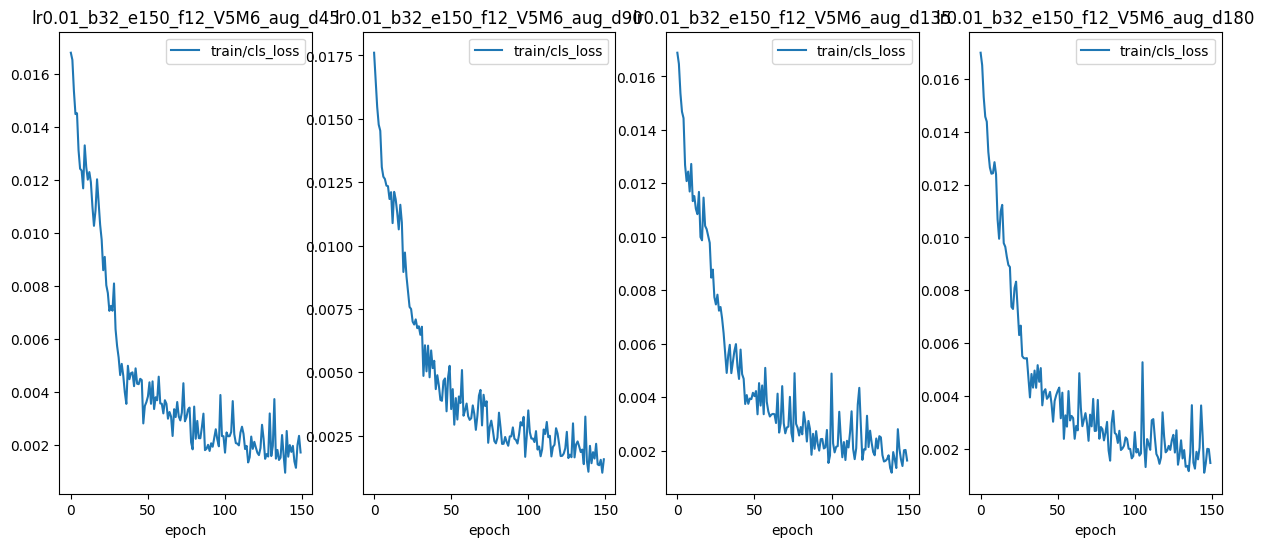

In [12]:
# Plots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 6))
results_d45.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[0]) 
results_d90.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[1])
results_d135.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[2])
results_d180.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[3])

# Set individual title 
axes[0].set_title('lr0.01_b32_e150_f12_V5M6_aug_d45')
axes[1].set_title('lr0.01_b32_e150_f12_V5M6_aug_d90')
axes[2].set_title('lr0.01_b32_e150_f12_V5M6_aug_d135')
axes[3].set_title('lr0.01_b32_e150_f12_V5M6_aug_d180')

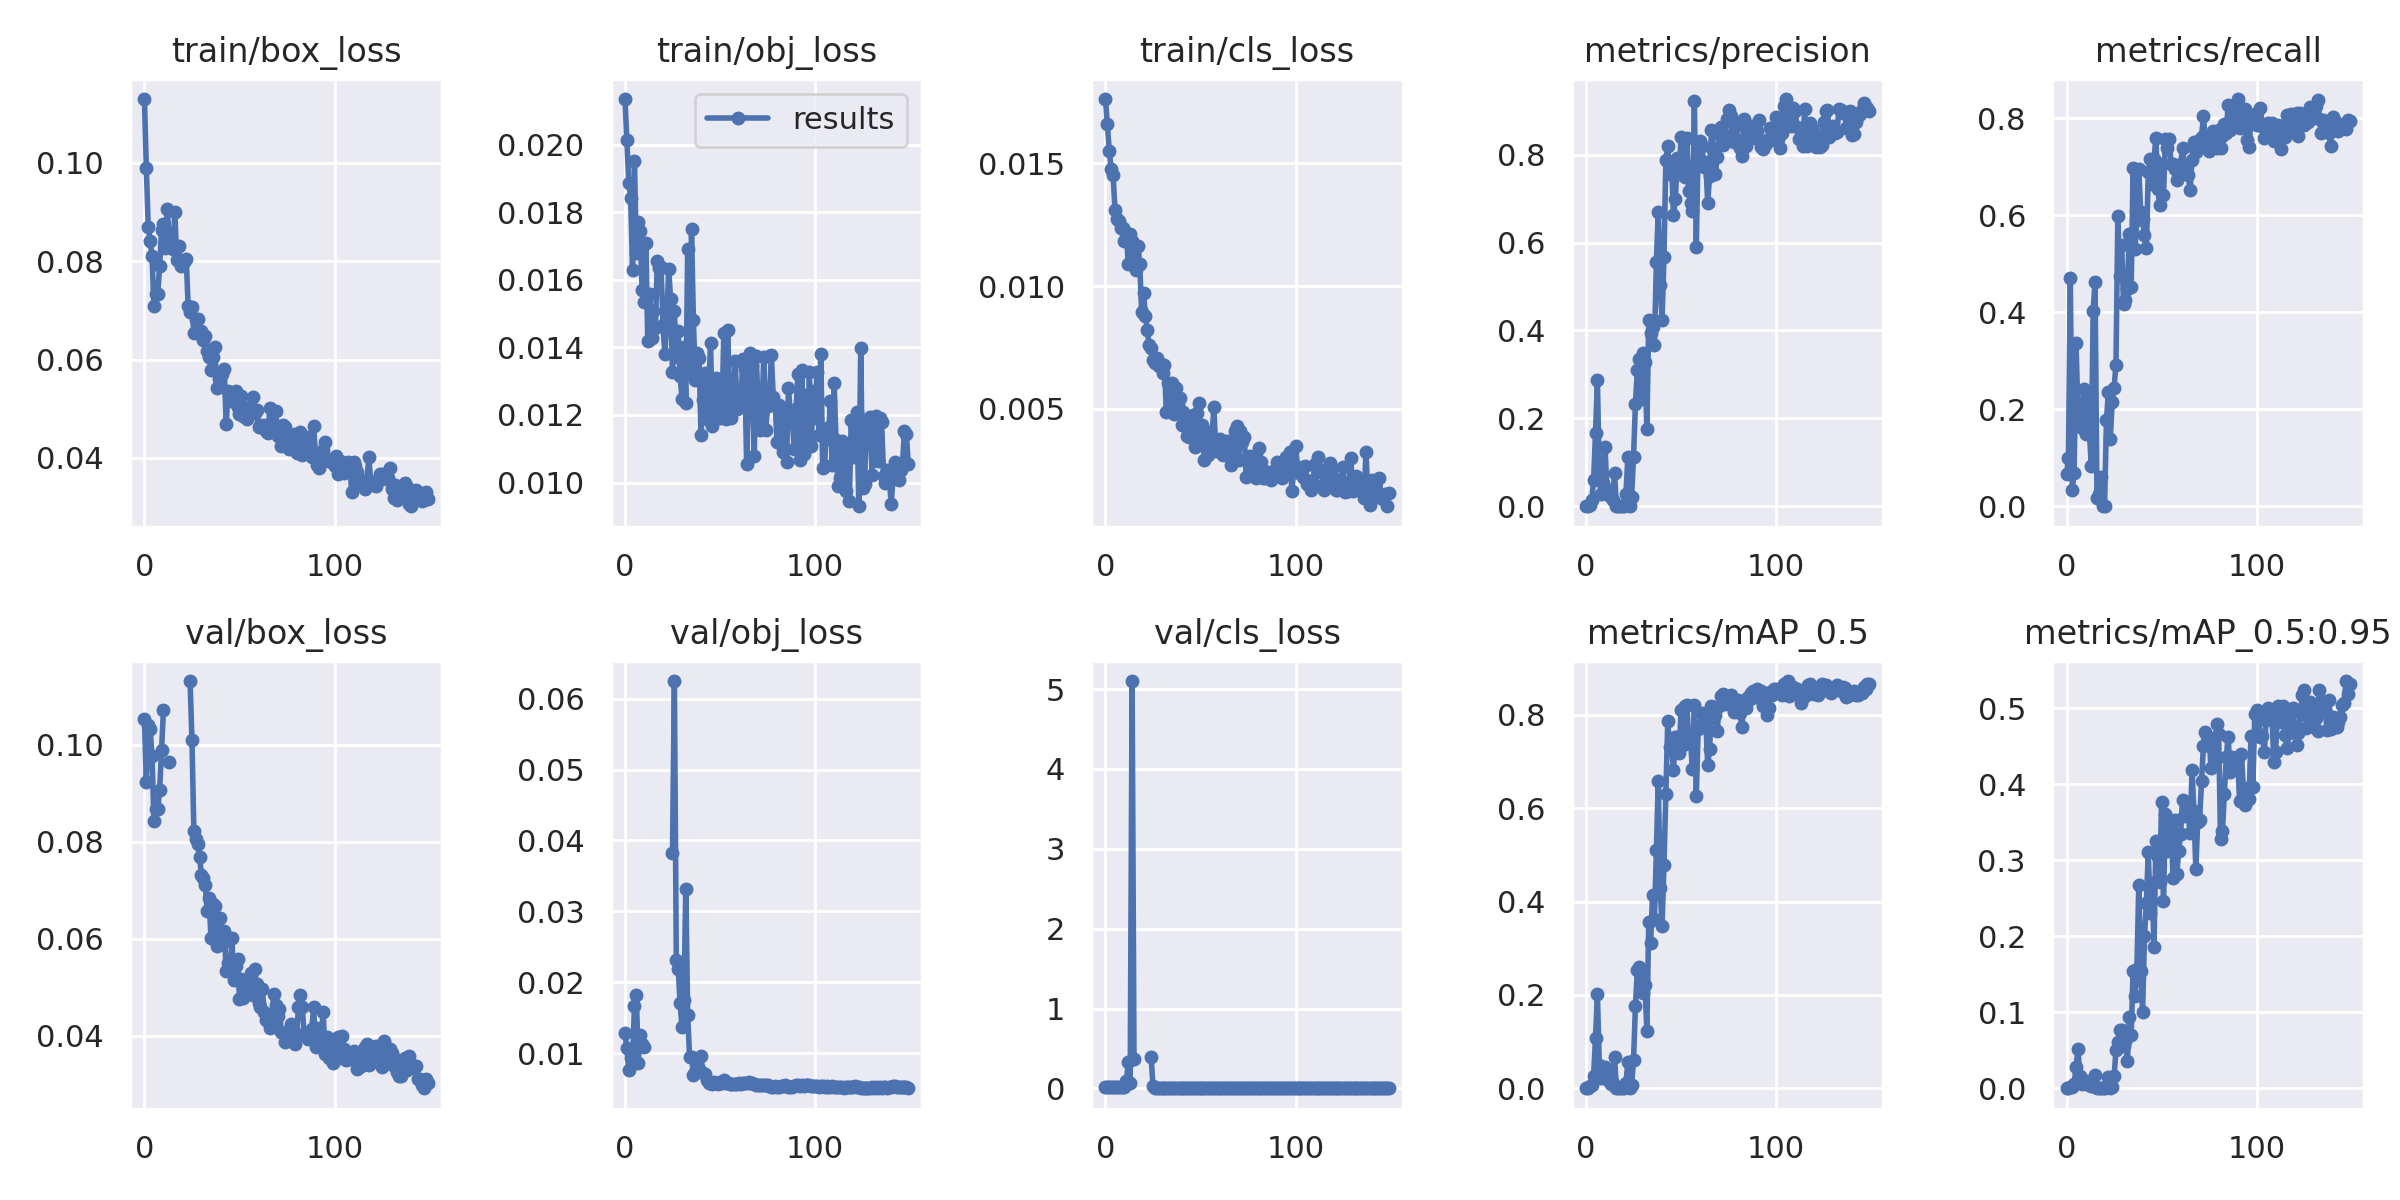

In [13]:
display.Image(f"Sverige/lr0.01_b32_e150_f12_V5M6_aug_d90/results.png")

#### This is not a good parameter to modify

### Hyperparameter tunning: Exploring only "flipud"

In [ ]:
# Set batch size 
batch_s = 32
hyper_path = 'Sverige/hyp.swedish_finetune_med.yaml'
flipud_ls = [0.1,0.5,0.9]

for flip in flipud_ls:
    # Give a name to the model
    model_name = f'lr0.01_b32_e150_f12_V5M6_aug_fup{flip}'
    print(f'**************TRAINING MODEL {model_name}*********')
    
    # Modify hyperparameters
    hyperparam_tuning(hyper_path, degrees_new=0.0, flipud_new=flip)# NO ROTATION BECAUSE IT MAKES THE MODEL WORSE
     
    # Train
    !python train.py --batch {batch_s} \
    --epochs 150 \
    --data {data_path} \
    --hyp {hyper_path}\
    --weights yolov5m6.pt \
    --cache \
    --freeze 12 \
    --project Sverige \
    --name {model_name}

In [26]:
# Read results
model_name = 'lr0.01_b32_e150_f12_V5M6_aug_fup0.1'
results_fup1_csv_path = f'Sverige/{model_name}/results.csv'
results_fup1 = rename_df_cols(pd.read_csv(results_fup1_csv_path))

model_name = 'lr0.01_b32_e150_f12_V5M6_aug_fup0.5'
results_fup5_csv_path = f'Sverige/{model_name}/results.csv'
results_fup5 = rename_df_cols(pd.read_csv(results_fup5_csv_path))

model_name = 'lr0.01_b32_e150_f12_V5M6_aug_fup0.9'
results_fup9_csv_path = f'Sverige/{model_name}/results.csv'
results_fup9 = rename_df_cols(pd.read_csv(results_fup9_csv_path))

Text(0.5, 1.0, 'lr0.01_b32_e150_f12_V5M6_aug_fup0.9')

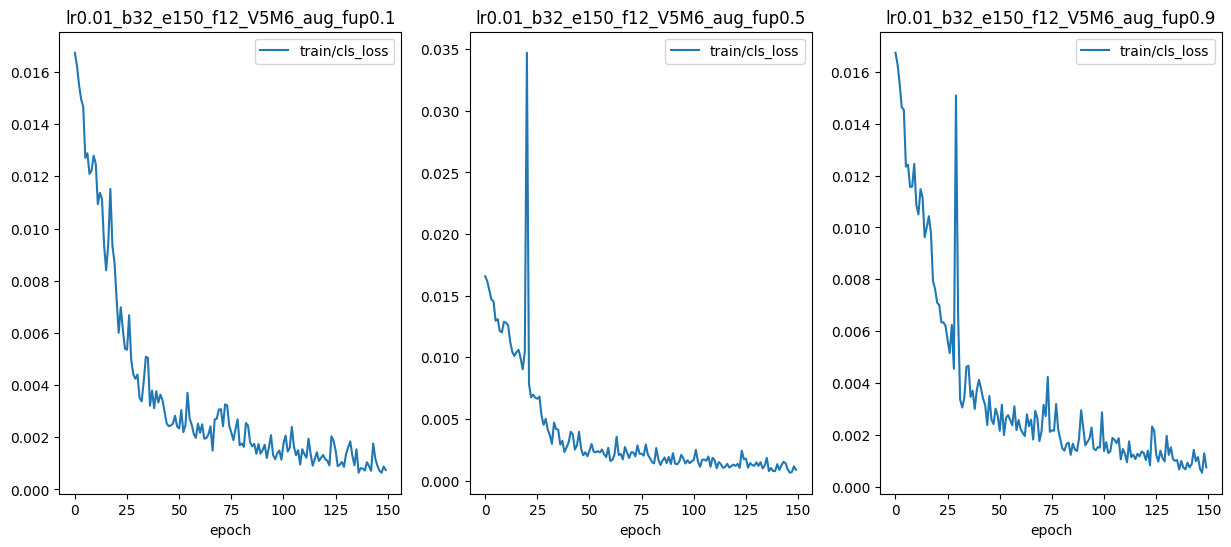

In [27]:
# Plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
results_fup1.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[0]) 
results_fup5.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[1])
results_fup9.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[2])

# Set individual title 
axes[0].set_title('lr0.01_b32_e150_f12_V5M6_aug_fup0.1')
axes[1].set_title('lr0.01_b32_e150_f12_V5M6_aug_fup0.5')
axes[2].set_title('lr0.01_b32_e150_f12_V5M6_aug_fup0.9')

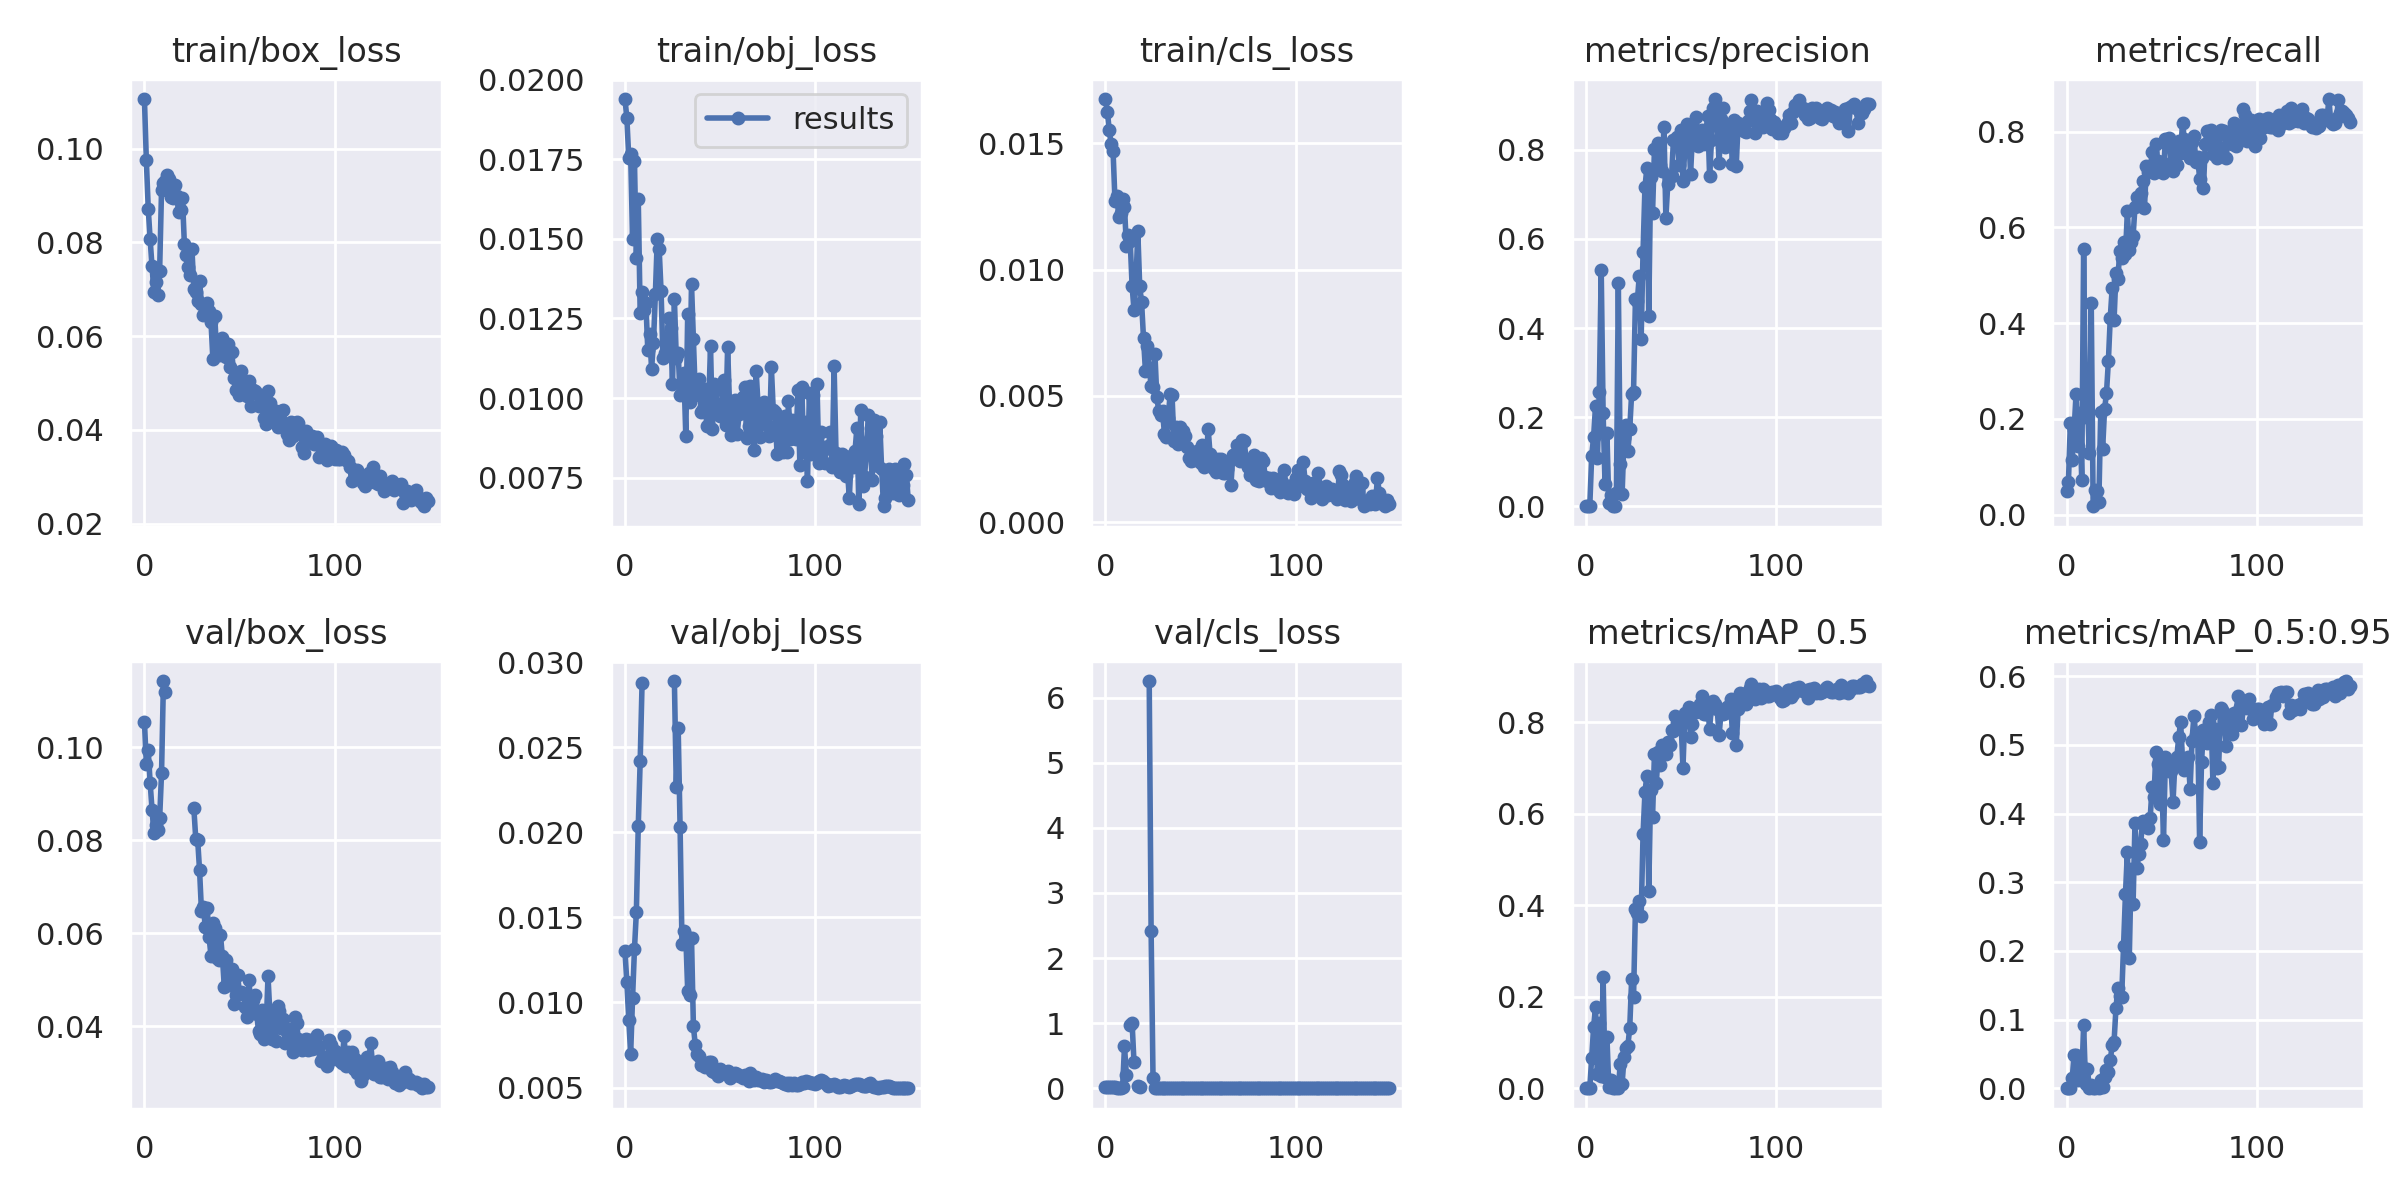

In [28]:
display.Image(f"Sverige/lr0.01_b32_e150_f12_V5M6_aug_fup0.1/results.png")

#### Same case as degree

In [23]:
# Set batch size 
batch_s = 32
hyper_path = 'Sverige/hyp.swedish_finetune_med.yaml'
fliplr_ls = [0.1,0.9] ## 0.5 is already done 

for flip in fliplr_ls:
    # Give a name to the model
    model_name = f'lr0.01_b32_e150_f12_V5M6_aug_flr{flip}'
    print(f'**************TRAINING MODEL {model_name}*********')
    
    # Modify hyperparameters
    hyperparam_tuning(hyper_path, degrees_new=0.0, flipud_new=0.0, fliplr_new=flip)# NO ROTATION BECAUSE IT MAKES THE MODEL WORSE
     
    # Train
    !python train.py --batch {batch_s} \
    --epochs 150 \
    --data {data_path} \
    --hyp {hyper_path}\
    --weights yolov5m6.pt \
    --cache \
    --freeze 12 \
    --project Sverige \
    --name {model_name}

**************TRAINING MODEL lr0.01_b32_e150_f12_V5M6_aug_flr0.1*********
train: weights=yolov5m6.pt, cfg=, data=/zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/Sverige/sverige_paths.yaml, hyp=Sverige/hyp.swedish_finetune_med.yaml, epochs=150, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=Sverige, name=lr0.01_b32_e150_f12_V5M6_aug_flr0.1, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[12], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 14 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5 🚀 v7.0-120-g3e55763 Python-3.10.8 torch-2.0.0+cu117 CUDA:0 (Quadro RTX 5000,

train: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-mea
  0%|          | 0/166 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
train: Caching images (0.1GB ram): 100%|██████████| 166/166 [00:00<00:00, 325.81
val: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means
libpng warning: iCCP: known incorrect sRGB profile
val: Caching images (0.0GB ram): 100%|██████████| 46/46 [00:00<00:00, 81.20it/s]

AutoAnchor: 4.10 anchors/target, 0.998 Best Possible Recall (BPR). Current anchors are a good fit to dataset ✅
Plotting labels to Sverige/lr0.01_b32_e150_f12_V5M6_aug_flr0.1/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to Sverige/lr0.01_b32_e150_f12_V5M6_aug_flr0.1
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      0/149      2.81G     0.1108    0.01941    0.01673         31        640: 1
                 Class     I

                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.829       0.67      0.788      0.412

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     45/149      4.74G    0.05983    0.01128   0.003394         41        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.813      0.624      0.741      0.414

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     46/149      4.74G    0.06298    0.00917   0.002556         18        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121       0.87      0.615      0.763      0.354

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     47/149      4.74G    0.06182    0.01028    0.00248         43        640: 1
          

     94/149      4.74G    0.04241   0.008411   0.001787         16        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121       0.88      0.774      0.854      0.531

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     95/149      4.74G    0.04089   0.009224   0.001339         36        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.892       0.77      0.848      0.555

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     96/149      4.74G    0.03832   0.007359   0.002262         33        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121       0.85      0.796      0.849      0.542

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     97/14

    119/149      4.74G    0.03003    0.00826   0.001724         11        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.893      0.812      0.878      0.566

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    120/149      4.74G    0.03199   0.007951   0.001293         48        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.901      0.789      0.873      0.558

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    121/149      4.74G    0.03214   0.008267    0.00142         39        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.884      0.796      0.876      0.557

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    122/14

    144/149      4.74G    0.02815    0.00696  0.0009432         18        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121       0.87      0.843      0.884      0.582

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    145/149      4.74G    0.02536   0.007548  0.0008882         35        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.865      0.842      0.888      0.592

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    146/149      4.74G    0.02548   0.007229  0.0006738         20        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.854      0.851      0.877       0.59

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    147/14

Model summary: 379 layers, 35281716 parameters, 35281716 gradients, 49.3 GFLOPs

Transferred 619/627 items from yolov5m6.pt
AMP: checks passed ✅
freezing model.0.conv.weight
freezing model.0.bn.weight
freezing model.0.bn.bias
freezing model.1.conv.weight
freezing model.1.bn.weight
freezing model.1.bn.bias
freezing model.2.cv1.conv.weight
freezing model.2.cv1.bn.weight
freezing model.2.cv1.bn.bias
freezing model.2.cv2.conv.weight
freezing model.2.cv2.bn.weight
freezing model.2.cv2.bn.bias
freezing model.2.cv3.conv.weight
freezing model.2.cv3.bn.weight
freezing model.2.cv3.bn.bias
freezing model.2.m.0.cv1.conv.weight
freezing model.2.m.0.cv1.bn.weight
freezing model.2.m.0.cv1.bn.bias
freezing model.2.m.0.cv2.conv.weight
freezing model.2.m.0.cv2.bn.weight
freezing model.2.m.0.cv2.bn.bias
freezing model.2.m.1.cv1.conv.weight
freezing model.2.m.1.cv1.bn.weight
freezing model.2.m.1.cv1.bn.bias
freezing model.2.m.1.cv2.conv.weight
freezing model.2.m.1.cv2.bn.weight
freezing model.2.m.1.cv2.bn


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      4/149      4.73G    0.07657    0.01559    0.01448         19        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.133      0.171     0.0622     0.0196

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      5/149      4.73G    0.07082    0.01788     0.0127         48        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.175      0.329       0.17     0.0574

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      6/149      4.73G    0.07244    0.01561     0.0124         90        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121       0.18      0.294      0.144     0.0332

      Epo


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     29/149      4.74G    0.07228    0.01124   0.003693         14        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.329      0.491      0.327      0.108

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     30/149      4.74G    0.07142    0.01096   0.003644         30        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.409      0.494      0.419      0.181

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     31/149      4.74G    0.06674    0.01157   0.003745         44        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.588      0.495      0.502      0.202

      Epo


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     54/149      4.74G    0.05354    0.01124   0.002749         64        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.769      0.666      0.733      0.337

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     55/149      4.74G    0.05275   0.009705   0.002819         29        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121       0.61      0.688      0.687      0.327

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     56/149      4.74G     0.0476   0.009116   0.002034         21        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.723      0.755      0.783      0.433

      Epo


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     79/149      4.74G    0.04088   0.009499   0.001806         16        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121       0.83       0.78      0.844      0.495

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     80/149      4.74G    0.03805   0.007944    0.00196         12        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121       0.89       0.78      0.847      0.496

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     81/149      4.74G    0.04044   0.009191   0.001358         29        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.846      0.786      0.843      0.492

      Epo


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    104/149      4.74G    0.03376   0.008069   0.001551         19        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.845      0.827      0.867      0.532

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    105/149      4.74G    0.03093   0.008069   0.001455         13        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121       0.85      0.818      0.862       0.54

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    106/149      4.74G     0.0321   0.008134    0.00116         53        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.832      0.803      0.852      0.519

      Epo


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    129/149      4.74G    0.02897   0.008465   0.001055         72        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.834      0.819      0.863      0.557

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    130/149      4.74G    0.02786   0.007204     0.0012         25        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.873      0.803      0.867      0.558

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    131/149      4.74G    0.02593   0.009071  0.0009138         60        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.857      0.795      0.847      0.557

      Epo

In [24]:
# Read results
model_name = 'lr0.01_b32_e150_f12_V5M6_aug_flr0.1'
results_flr1_csv_path = f'Sverige/{model_name}/results.csv'
results_flr1 = rename_df_cols(pd.read_csv(results_flr1_csv_path))

model_name = 'lr0.01_b32_e150_f12_V5M6_aug_flr0.9'
results_flr9_csv_path = f'Sverige/{model_name}/results.csv'
results_flr9 = rename_df_cols(pd.read_csv(results_flr9_csv_path))

Text(0.5, 1.0, 'lr0.01_b32_e150_f12_V5M6_aug_flr0.9')

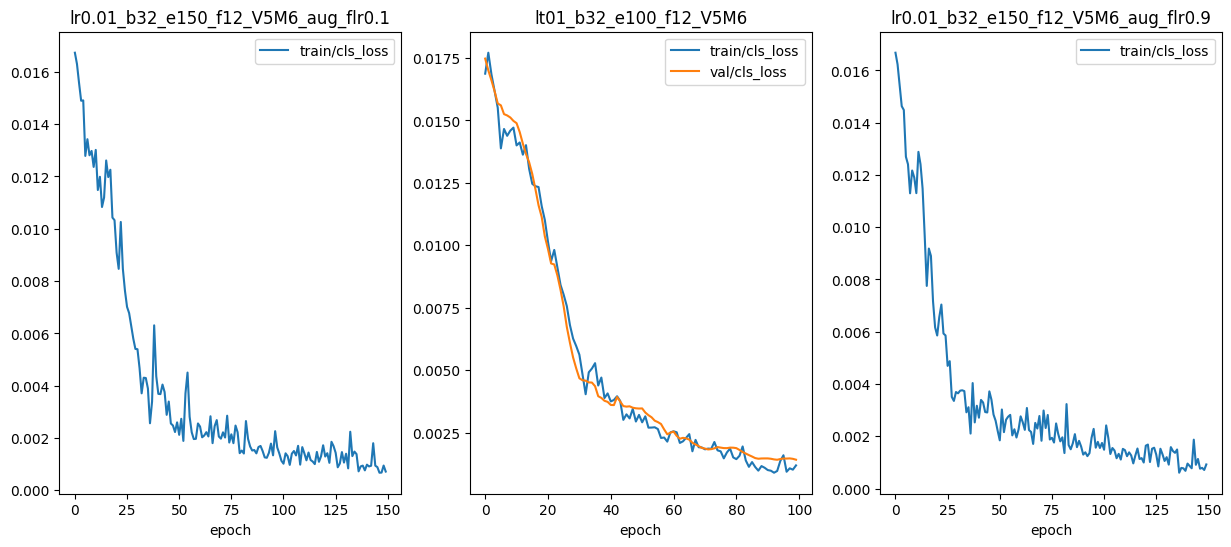

In [33]:
# Plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
results_flr1.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[0])
results_V5M6.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[1])
results_flr9.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[2])

# Set individual title 
axes[0].set_title('lr0.01_b32_e150_f12_V5M6_aug_flr0.1')
axes[1].set_title('lt01_b32_e100_f12_V5M6')
axes[2].set_title('lr0.01_b32_e150_f12_V5M6_aug_flr0.9')

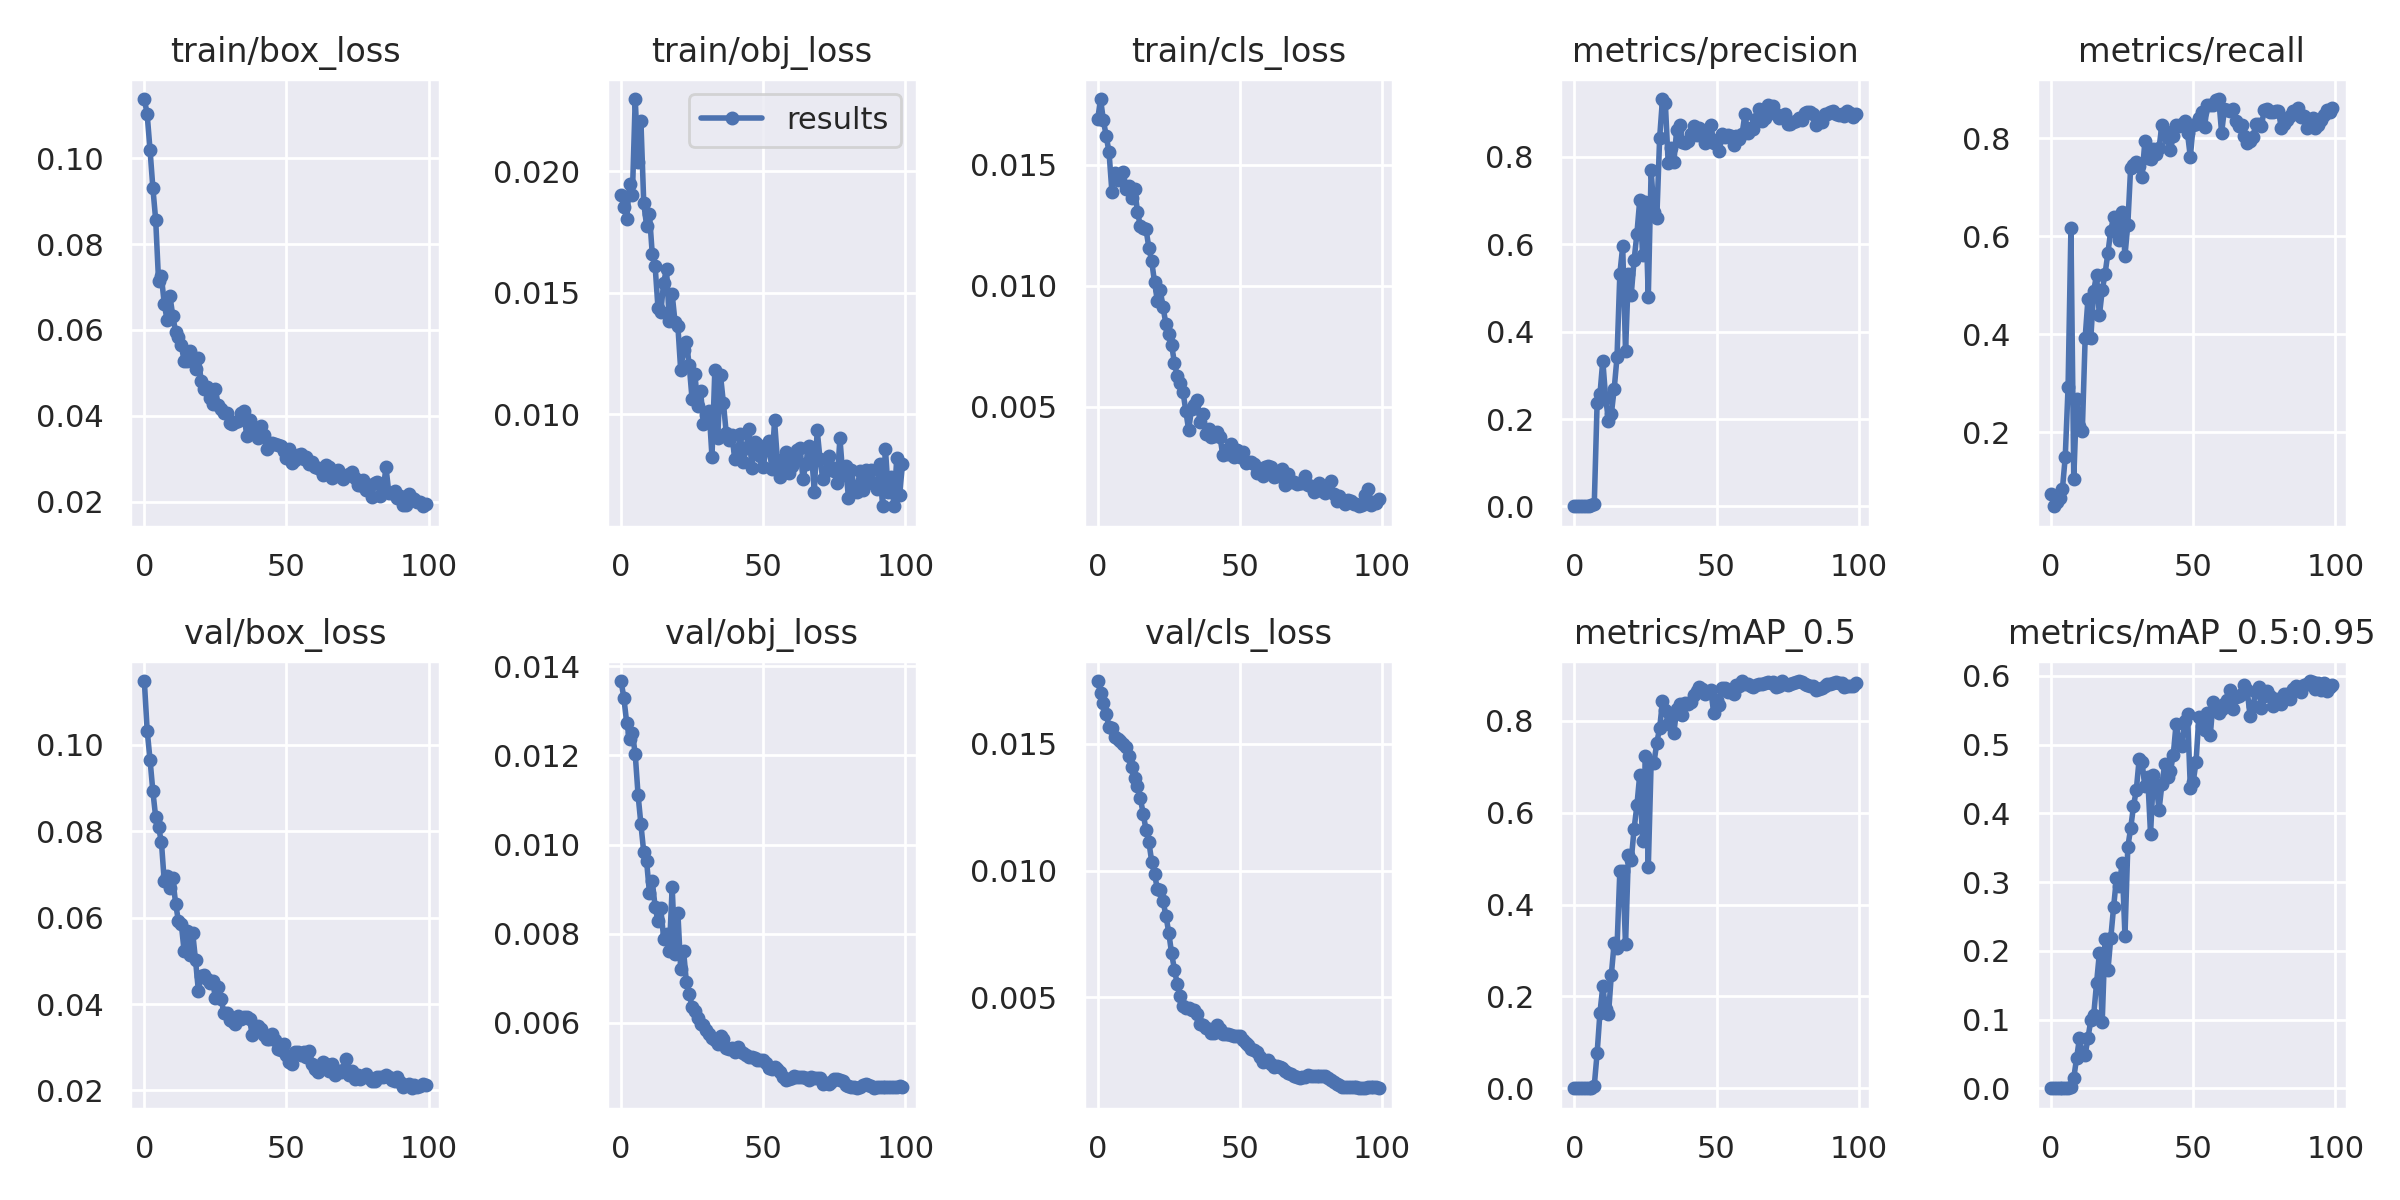

In [34]:
display.Image(f"Sverige/lr0.01_b32_e100_f12_V5M6/results.png")

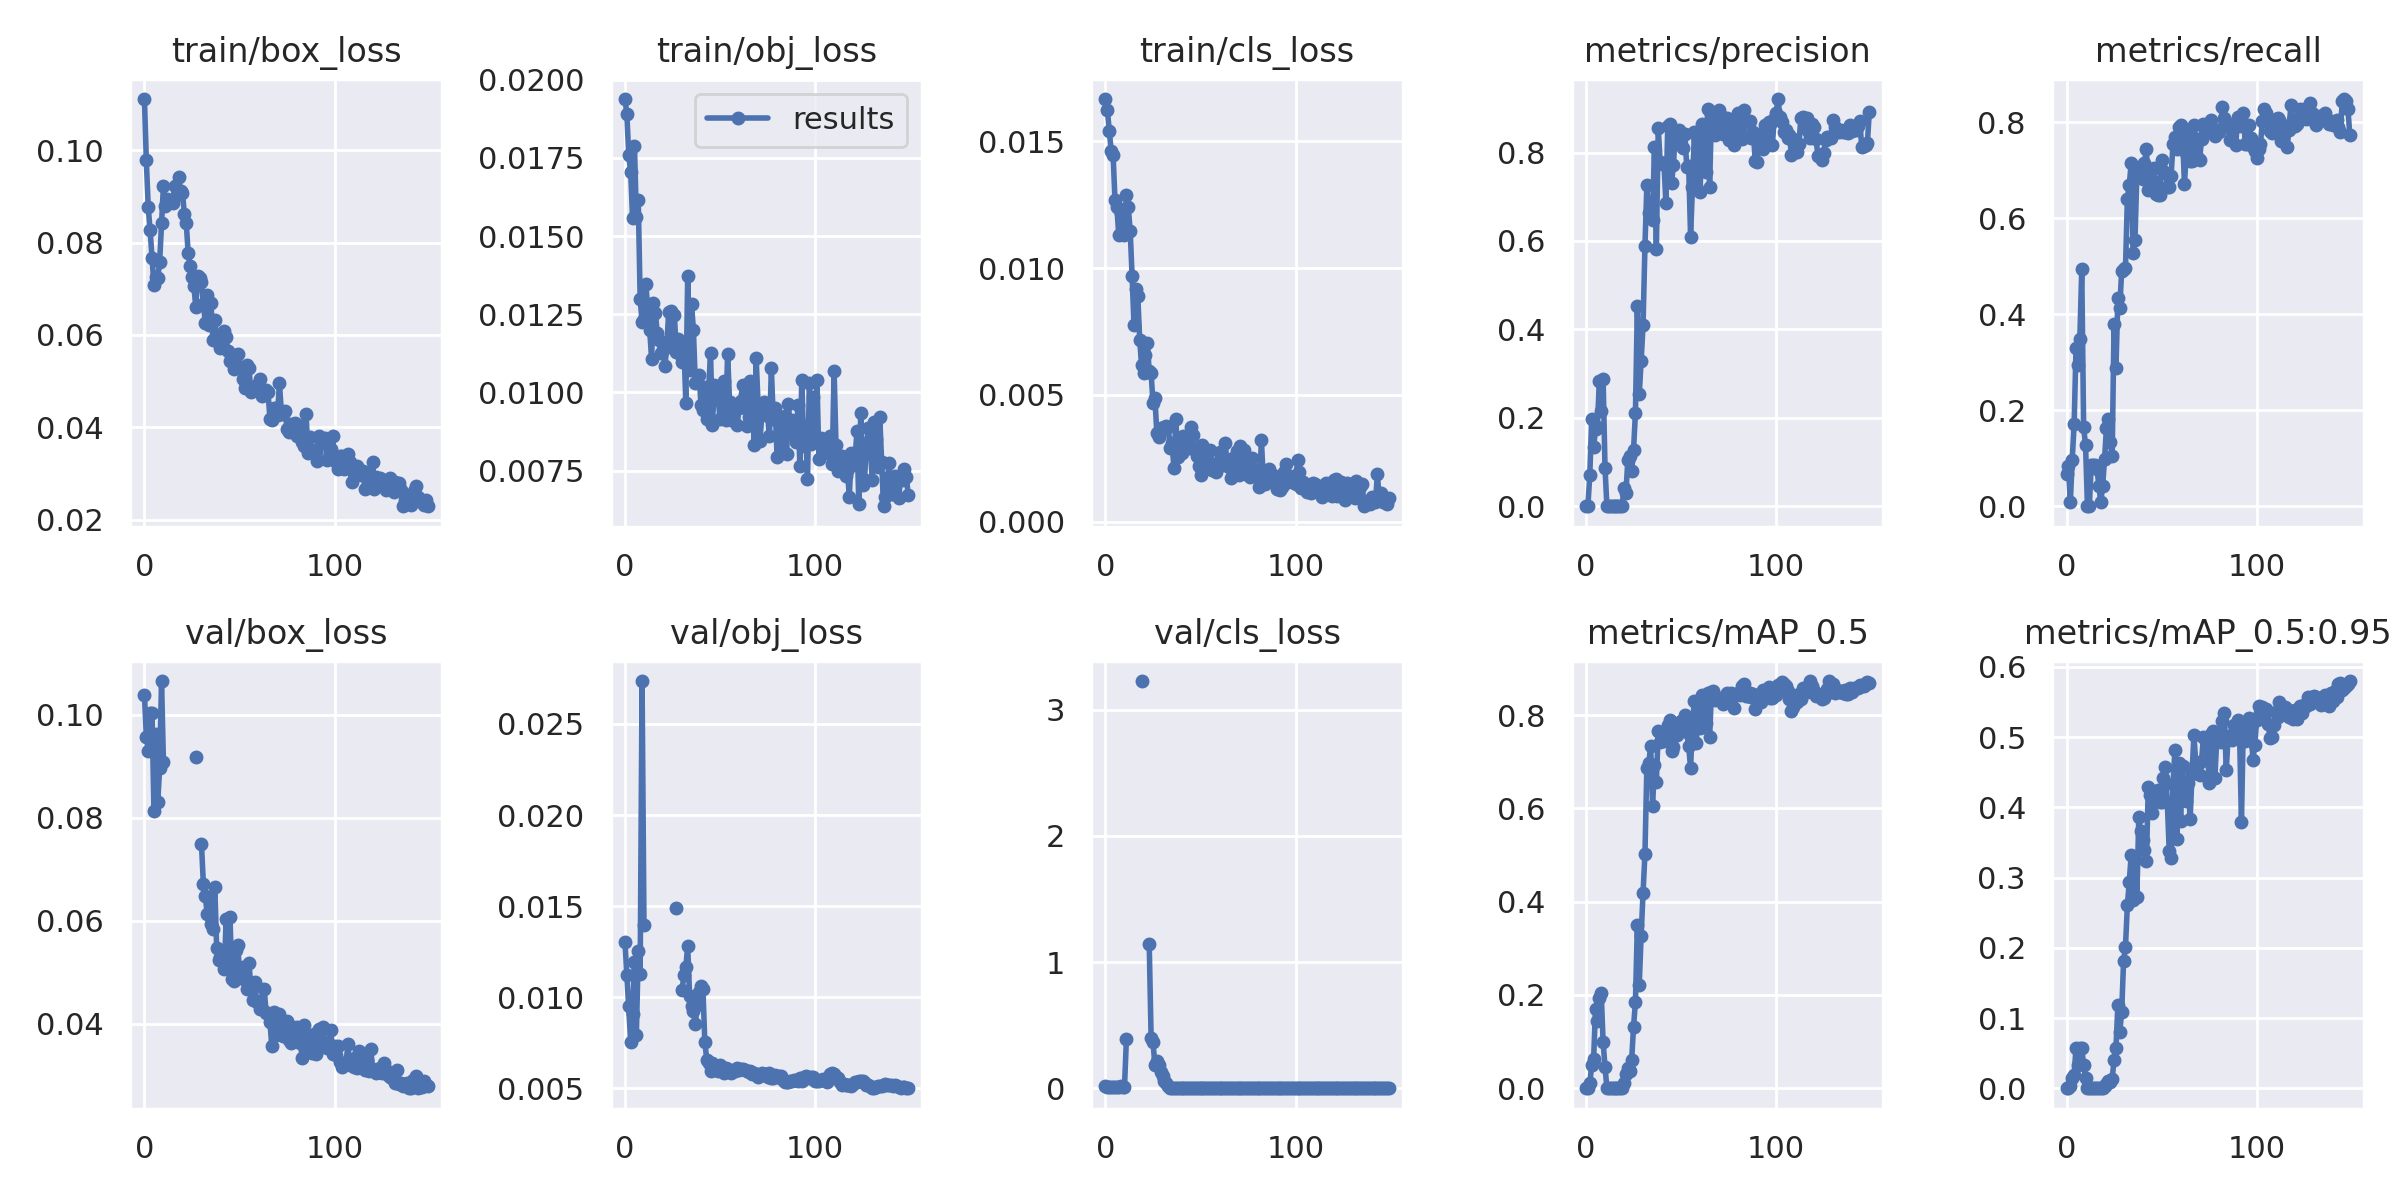

In [36]:
display.Image(f"Sverige/lr0.01_b32_e150_f12_V5M6_aug_flr0.9/results.png")

## The best model so far is <span style="color:red">lr0.01_b32_e100_f12_V5M6</span>. 

* Batch size 32
* Learning rate 0.01
* Degree 0.0
* Flipud 0.0
* Fliplr 0.5